In [4]:

import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score,confusion_matrix, mean_absolute_error , r2_score , mean_squared_error, mean_absolute_percentage_error
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import compute_class_weight
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, LeakyReLU,BatchNormalization
from keras import regularizers
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
# from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings("ignore")

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import classification_report, confusion_matrix
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.estimators import HillClimbSearch, BicScore
from pgmpy.inference import VariableElimination
from sklearn.preprocessing import LabelEncoder



In [5]:
df = pd.read_csv("../Data/cancer_patient.csv")
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [6]:
df.shape

(1000, 26)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [8]:
df.dtypes

index                        int64
Patient Id                  object
Age                          int64
Gender                       int64
Air Pollution                int64
Alcohol use                  int64
Dust Allergy                 int64
OccuPational Hazards         int64
Genetic Risk                 int64
chronic Lung Disease         int64
Balanced Diet                int64
Obesity                      int64
Smoking                      int64
Passive Smoker               int64
Chest Pain                   int64
Coughing of Blood            int64
Fatigue                      int64
Weight Loss                  int64
Shortness of Breath          int64
Wheezing                     int64
Swallowing Difficulty        int64
Clubbing of Finger Nails     int64
Frequent Cold                int64
Dry Cough                    int64
Snoring                      int64
Level                       object
dtype: object

In [9]:
for col in df.columns:
    print(df[col].describe())
    print("\n")

count    1000.000000
mean      499.500000
std       288.819436
min         0.000000
25%       249.750000
50%       499.500000
75%       749.250000
max       999.000000
Name: index, dtype: float64


count     1000
unique    1000
top         P1
freq         1
Name: Patient Id, dtype: object


count    1000.000000
mean       37.174000
std        12.005493
min        14.000000
25%        27.750000
50%        36.000000
75%        45.000000
max        73.000000
Name: Age, dtype: float64


count    1000.000000
mean        1.402000
std         0.490547
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: Gender, dtype: float64


count    1000.0000
mean        3.8400
std         2.0304
min         1.0000
25%         2.0000
50%         3.0000
75%         6.0000
max         8.0000
Name: Air Pollution, dtype: float64


count    1000.000000
mean        4.563000
std         2.620477
min         1.000000
25%         2.000000
50%         5.0000

In [10]:
df.isnull().any()

index                       False
Patient Id                  False
Age                         False
Gender                      False
Air Pollution               False
Alcohol use                 False
Dust Allergy                False
OccuPational Hazards        False
Genetic Risk                False
chronic Lung Disease        False
Balanced Diet               False
Obesity                     False
Smoking                     False
Passive Smoker              False
Chest Pain                  False
Coughing of Blood           False
Fatigue                     False
Weight Loss                 False
Shortness of Breath         False
Wheezing                    False
Swallowing Difficulty       False
Clubbing of Finger Nails    False
Frequent Cold               False
Dry Cough                   False
Snoring                     False
Level                       False
dtype: bool

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
for col in df.columns:
    print(df[col].value_counts())

index
0      1
671    1
658    1
659    1
660    1
      ..
338    1
339    1
340    1
341    1
999    1
Name: count, Length: 1000, dtype: int64
Patient Id
P1      1
P702    1
P691    1
P692    1
P693    1
       ..
P402    1
P403    1
P404    1
P405    1
P999    1
Name: count, Length: 1000, dtype: int64
Age
35    77
33    69
38    69
37    51
44    51
27    48
45    42
48    40
26    37
28    32
52    31
32    31
24    30
25    30
62    30
46    23
39    21
36    21
47    20
42    20
19    20
17    20
53    19
22    19
23    19
29    19
18    18
55    11
73    10
34    10
65    10
64    10
61    10
49    10
14     9
31     9
43     1
51     1
54     1
63     1
Name: count, dtype: int64
Gender
1    598
2    402
Name: count, dtype: int64
Air Pollution
6    326
2    201
3    173
1    141
4     90
7     30
5     20
8     19
Name: count, dtype: int64
Alcohol use
2    202
8    188
7    167
1    152
5     90
3     80
6     80
4     41
Name: count, dtype: int64
Dust Allergy
7    405
4    133


## Data Processing

In [13]:
labels = {
    0: "extremely low",
    1: "very low",
    2: "low",
    3: "below medium average",
    4: "medium",
    5: "above medium average",
    6: "high",
    7: "very high",
    8: "extremely high",
    9: "Maximum"
}

<BarContainer object of 1000 artists>

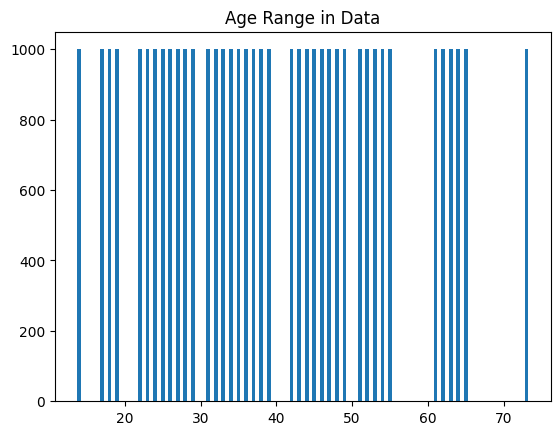

In [14]:
plt.title("Age Range in Data")
plt.bar(df['Age'], height=df.shape[0],width=.5)

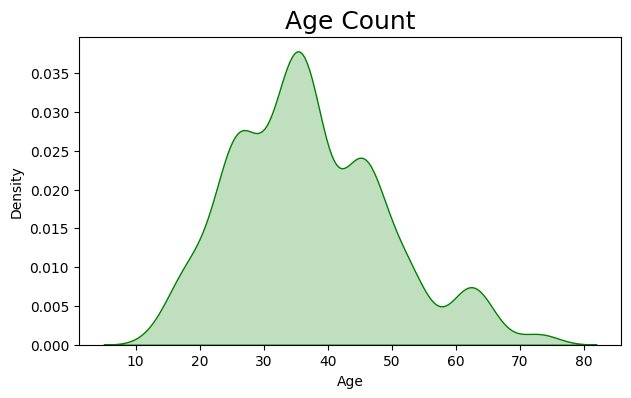

In [15]:
plt.figure(figsize = (7,4))
sns.kdeplot(df.Age, shade = True, color = "g")
plt.title("Age Count", fontsize = 18)
plt.show()


In [16]:
df1 = df.drop(["Level","Patient Id","index"],axis=1)

### Features correlation

<Axes: >

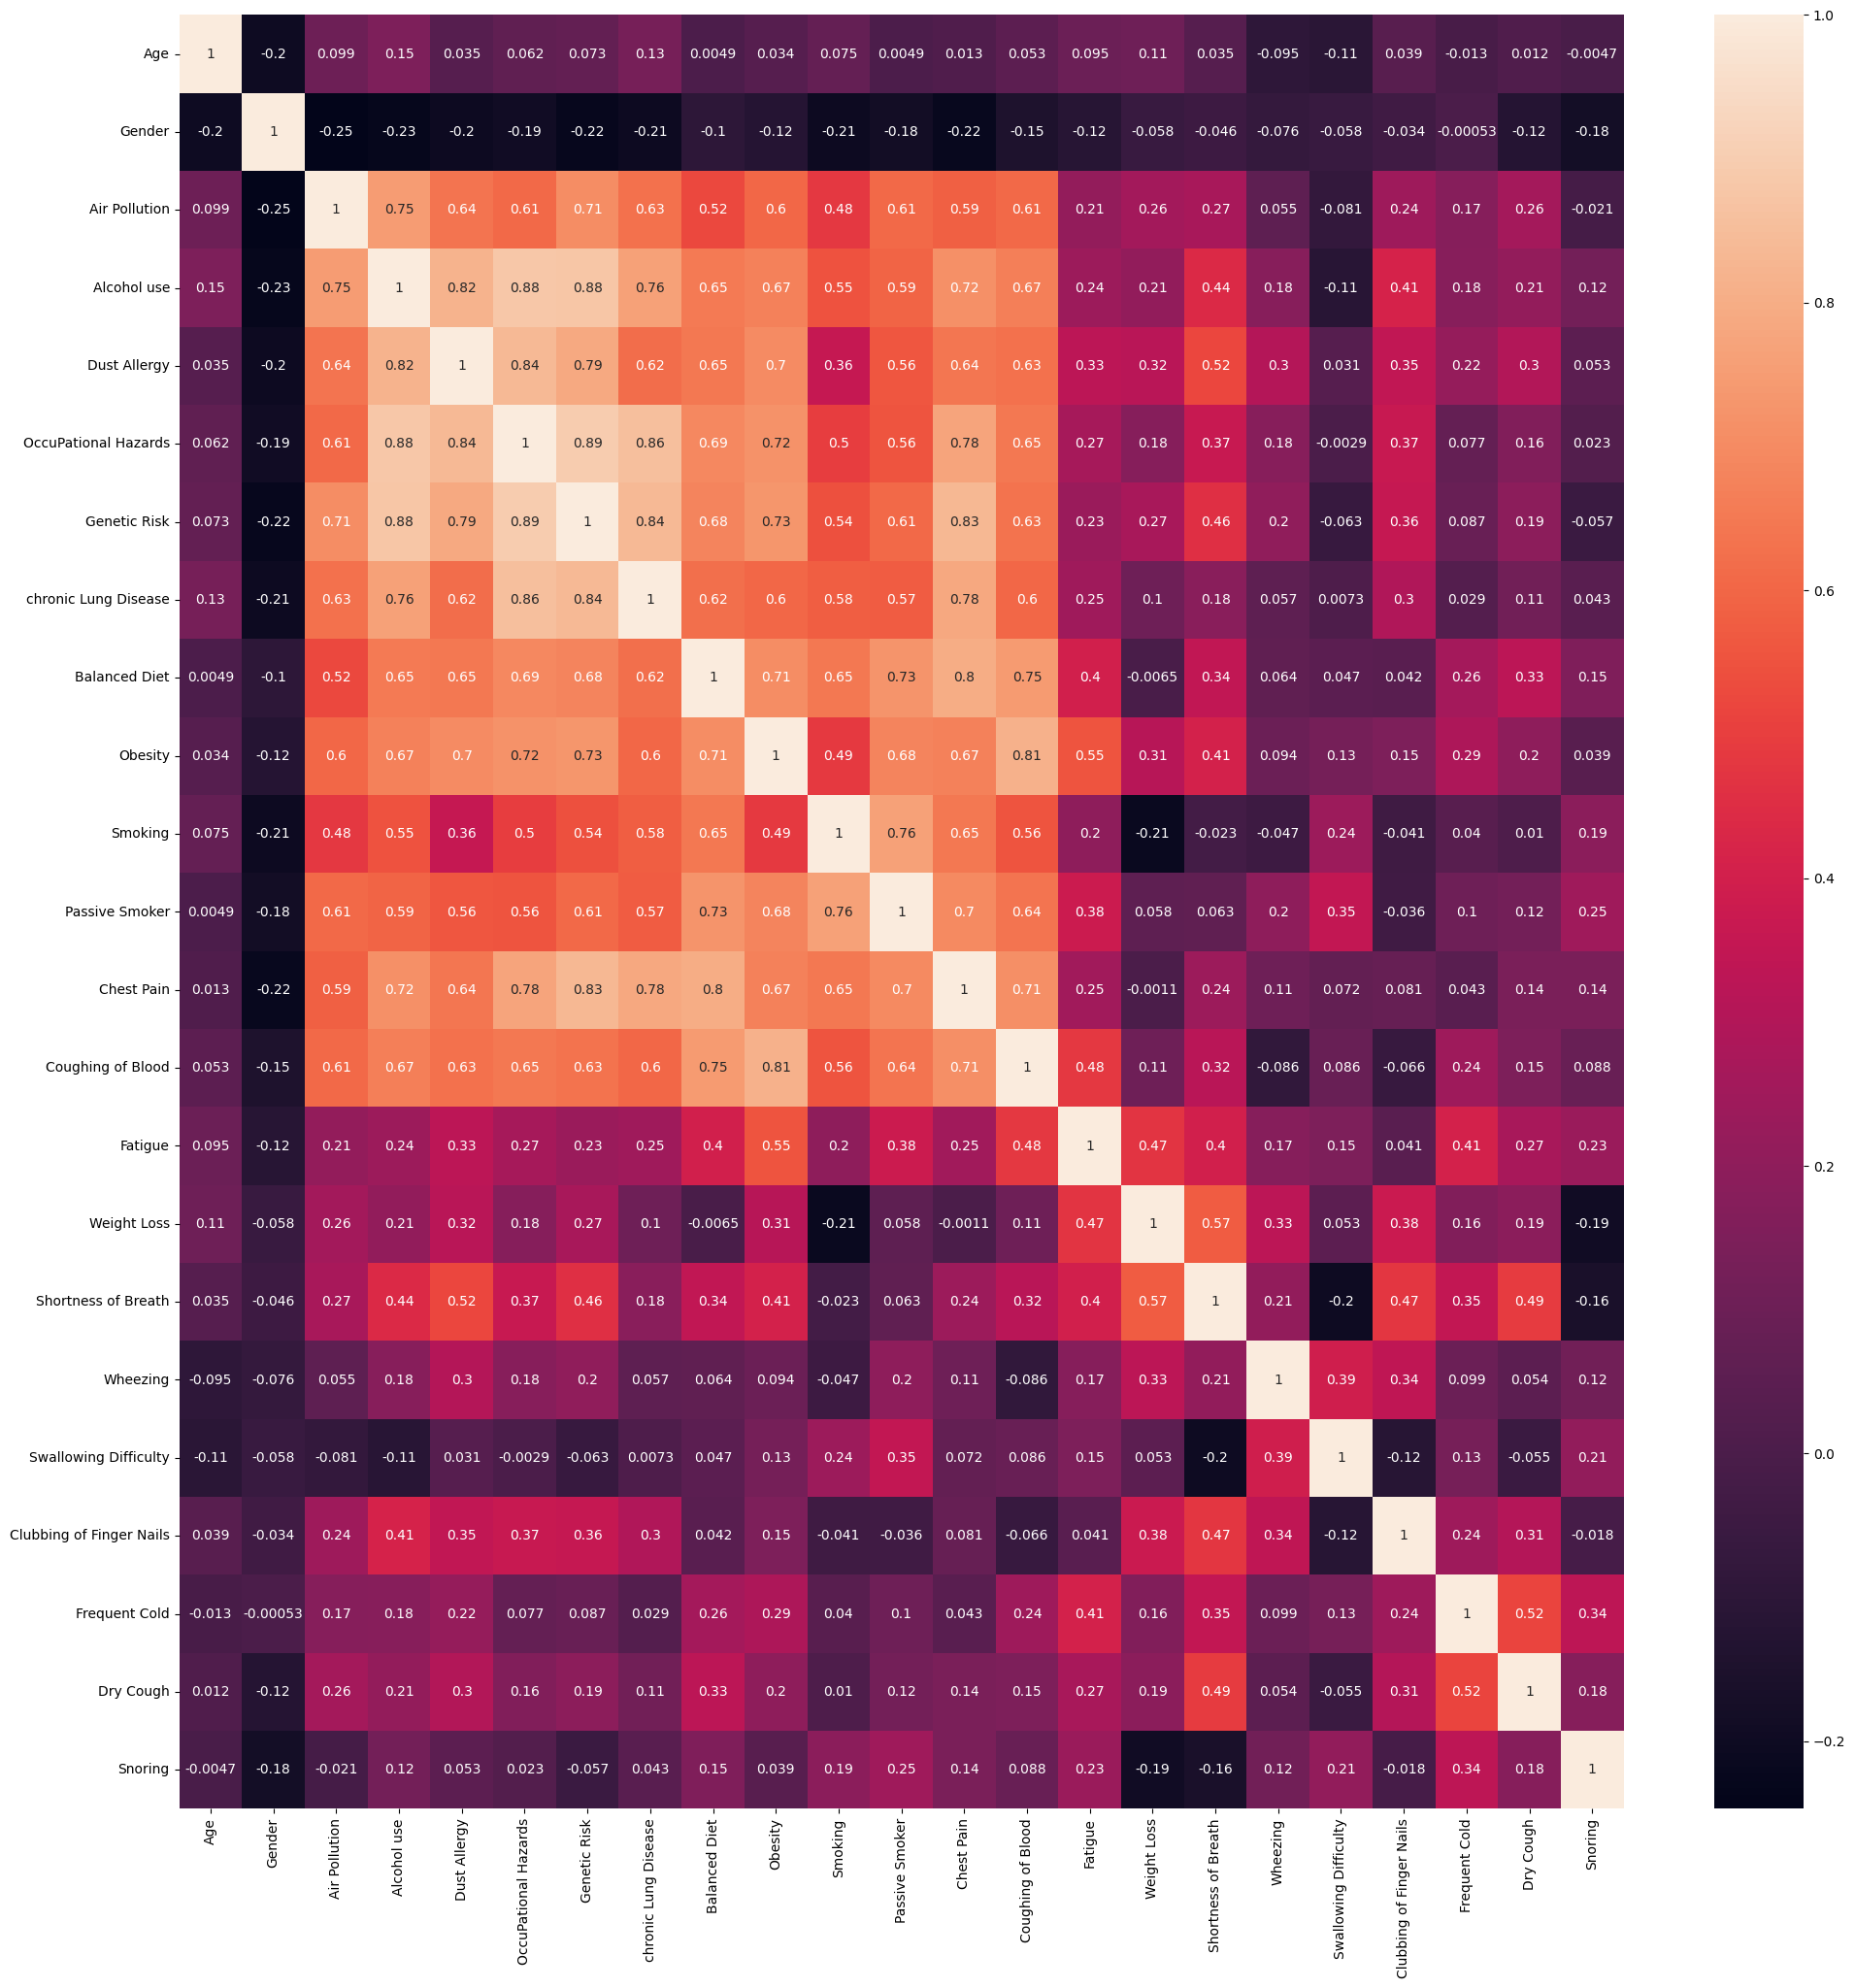

In [17]:
plt.subplots(figsize = (24, 24))
sns.heatmap(df1.corr(), annot = True)


In [18]:
correlationC=[]
for col in df1.columns :
    for column in df1.columns:
        a = df1[col].corr(df1[column])
        if a > 0.8 and (col != column) :
            if a in correlationC:
                continue
            else :
                correlationC.append(a)         
                print (col +" column has high correlation with column "+ column)
                print(df1[col].corr(df1[column]))
                print("\n")

Alcohol use column has high correlation with column Dust Allergy
0.818643519509921


Alcohol use column has high correlation with column OccuPational Hazards
0.8787859206801735


Alcohol use column has high correlation with column Genetic Risk
0.8772098877053731


Dust Allergy column has high correlation with column OccuPational Hazards
0.8358597714567231


OccuPational Hazards column has high correlation with column Dust Allergy
0.835859771456723


OccuPational Hazards column has high correlation with column Genetic Risk
0.8930485226784648


OccuPational Hazards column has high correlation with column chronic Lung Disease
0.8582838533909197


Genetic Risk column has high correlation with column Alcohol use
0.877209887705373


Genetic Risk column has high correlation with column chronic Lung Disease
0.836230827381166


Genetic Risk column has high correlation with column Chest Pain
0.8317508263736837


chronic Lung Disease column has high correlation with column OccuPational Hazards
0.

In [19]:
correlationC.sort()
correlationC.reverse()
correlationC

[np.float64(0.8930485226784648),
 np.float64(0.8787859206801735),
 np.float64(0.8772098877053731),
 np.float64(0.877209887705373),
 np.float64(0.8582838533909197),
 np.float64(0.8582838533909196),
 np.float64(0.8362308273811662),
 np.float64(0.836230827381166),
 np.float64(0.8358597714567231),
 np.float64(0.835859771456723),
 np.float64(0.8317508263736837),
 np.float64(0.818643519509921),
 np.float64(0.8148047650547872)]

### Decoding the data

In [20]:
df["Gender"] = df["Gender"].replace([1,2],["Female","Male"])
df["Air Pollution"] = df["Air Pollution"].replace([1,2,3,4,5,6,7,8],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7],labels[8]])
df["Dust Allergy"] = df["Dust Allergy"].replace([1,2,3,4,5,6,7,8],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7],labels[8]])
df["OccuPational Hazards"] = df["OccuPational Hazards"].replace([1,2,3,4,5,6,7,8],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7],labels[8]])
df["Genetic Risk"] = df["Genetic Risk"].replace([1,2,3,4,5,6,7],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7]])
df["chronic Lung Disease"] = df["chronic Lung Disease"].replace([1,2,3,4,5,6,7],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7]])
df["Fatigue"] = df["Fatigue"].replace([1,2,3,4,5,6,7,8,9],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7],labels[8],labels[9]])
df["Weight Loss"] = df["Weight Loss"].replace([1,2,3,4,5,6,7,8],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7],labels[8]])
df["Shortness of Breath"] = df["Shortness of Breath"].replace([1,2,3,4,5,6,7,8,9],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7],labels[8],labels[9]])
df["Wheezing"] = df["Wheezing"].replace([1,2,3,4,5,6,7,8],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7],labels[8]])
df["Swallowing Difficulty"] = df["Swallowing Difficulty"].replace([1,2,3,4,5,6,7,8],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7],labels[8]])
df["Clubbing of Finger Nails"] = df["Clubbing of Finger Nails"].replace([1,2,3,4,5,6,7,8,9],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7],labels[8],labels[9]])
df["Frequent Cold"] = df["Frequent Cold"].replace([1,2,3,4,5,6,7],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7]])
df["Dry Cough"] = df["Dry Cough"].replace([1,2,3,4,5,6,7],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7]])
df["Snoring"] = df["Snoring"].replace([1,2,3,4,5,6,7],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7]])
df["Obesity"] = df["Obesity"].replace([1,2,3,4,5,6,7],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7]])
df["Passive Smoker"] = df["Passive Smoker"].replace([1,2,3,4,5,6,7,8],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7],labels[8]])
df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,Female,low,4,above medium average,medium,below medium average,low,...,below medium average,medium,low,low,below medium average,very low,low,below medium average,medium,Low
1,1,P10,17,Female,below medium average,1,above medium average,below medium average,medium,low,...,very low,below medium average,very high,extremely high,high,low,very low,very high,low,Medium
2,2,P100,35,Female,medium,5,high,above medium average,above medium average,medium,...,extremely high,very high,Maximum,low,very low,medium,high,very high,low,High
3,3,P1000,37,Female,very high,7,very high,very high,high,very high,...,medium,low,below medium average,very low,medium,above medium average,high,very high,above medium average,High
4,4,P101,46,Female,high,8,very high,very high,very high,high,...,below medium average,low,medium,very low,medium,low,medium,low,below medium average,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,Female,high,7,very high,very high,very high,high,...,above medium average,below medium average,low,very high,extremely high,low,medium,above medium average,below medium average,High
996,996,P996,37,Male,high,8,very high,very high,very high,high,...,Maximum,high,above medium average,very high,low,medium,below medium average,very low,medium,High
997,997,P997,25,Male,medium,5,high,above medium average,above medium average,medium,...,extremely high,very high,Maximum,low,very low,medium,high,very high,low,High
998,998,P998,18,Male,high,8,very high,very high,very high,high,...,below medium average,low,medium,very low,medium,low,medium,low,below medium average,High


In [21]:
df["Passive Smoker"].value_counts()

Passive Smoker
low                     284
very high               187
medium                  161
below medium average    140
extremely high          108
very low                 60
high                     30
above medium average     30
Name: count, dtype: int64

In [22]:
df.Level.value_counts()

Level
High      365
Medium    332
Low       303
Name: count, dtype: int64

<Axes: title={'center': 'Level Column Values'}, ylabel='count'>

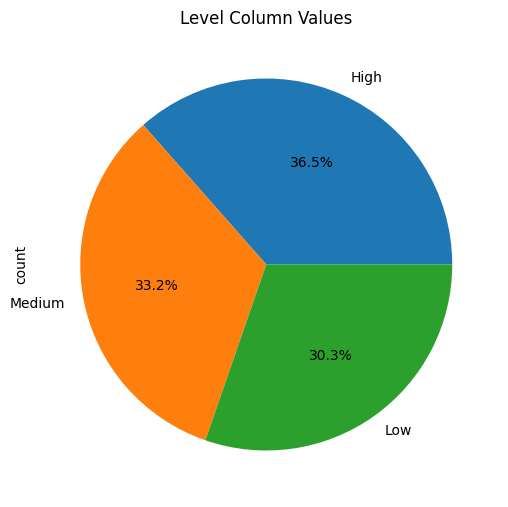

In [23]:
plt.figure(figsize=(6,7))
plt.title("Level Column Values")
round(df["Level"].value_counts()/df.shape[0]*100,2).plot.pie(autopct= '%2.1f%%')

### Relation between Occupatinal Hazard and Genetic Risk

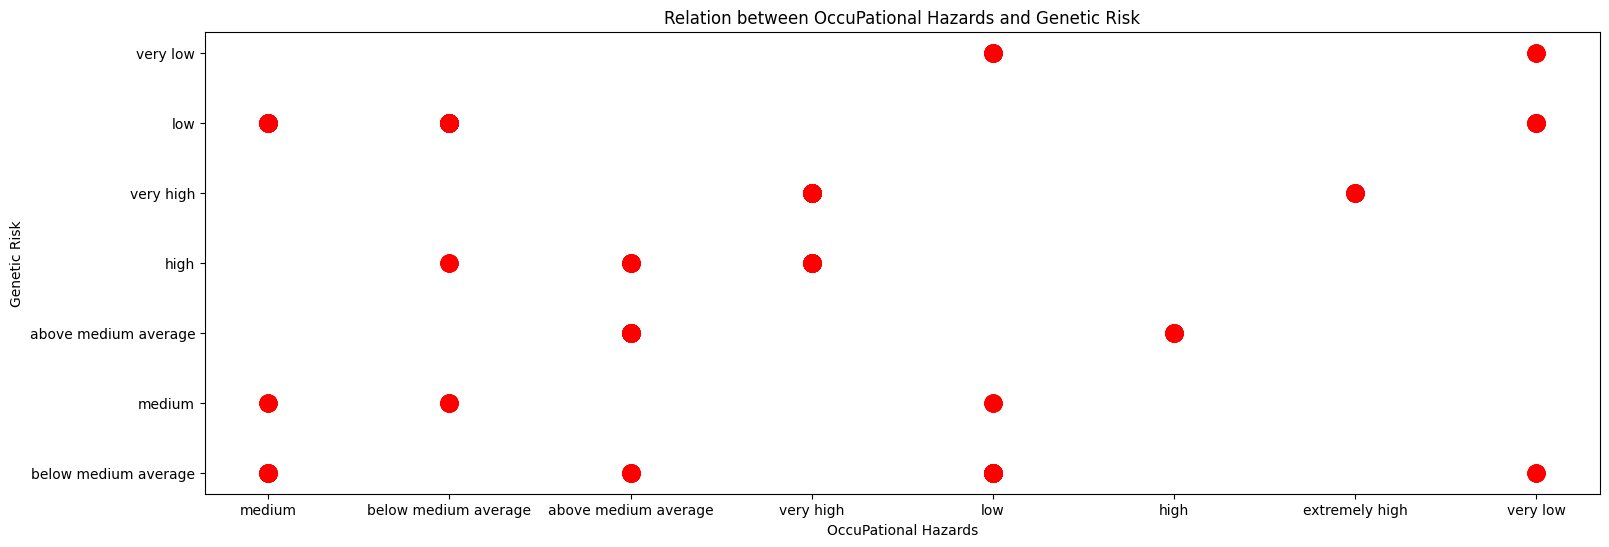

In [24]:
f = plt.figure(figsize=(18, 6))
plt.xlabel("OccuPational Hazards")
plt.ylabel("Genetic Risk")
plt.title("Relation between OccuPational Hazards and Genetic Risk")
plt.scatter(df["OccuPational Hazards"],df["Genetic Risk"],alpha=0.7,c="red",linewidths=7)


#### Gender

[Text(0.5, 1.0, 'Relation Between OccuPational Hazards and Gender')]

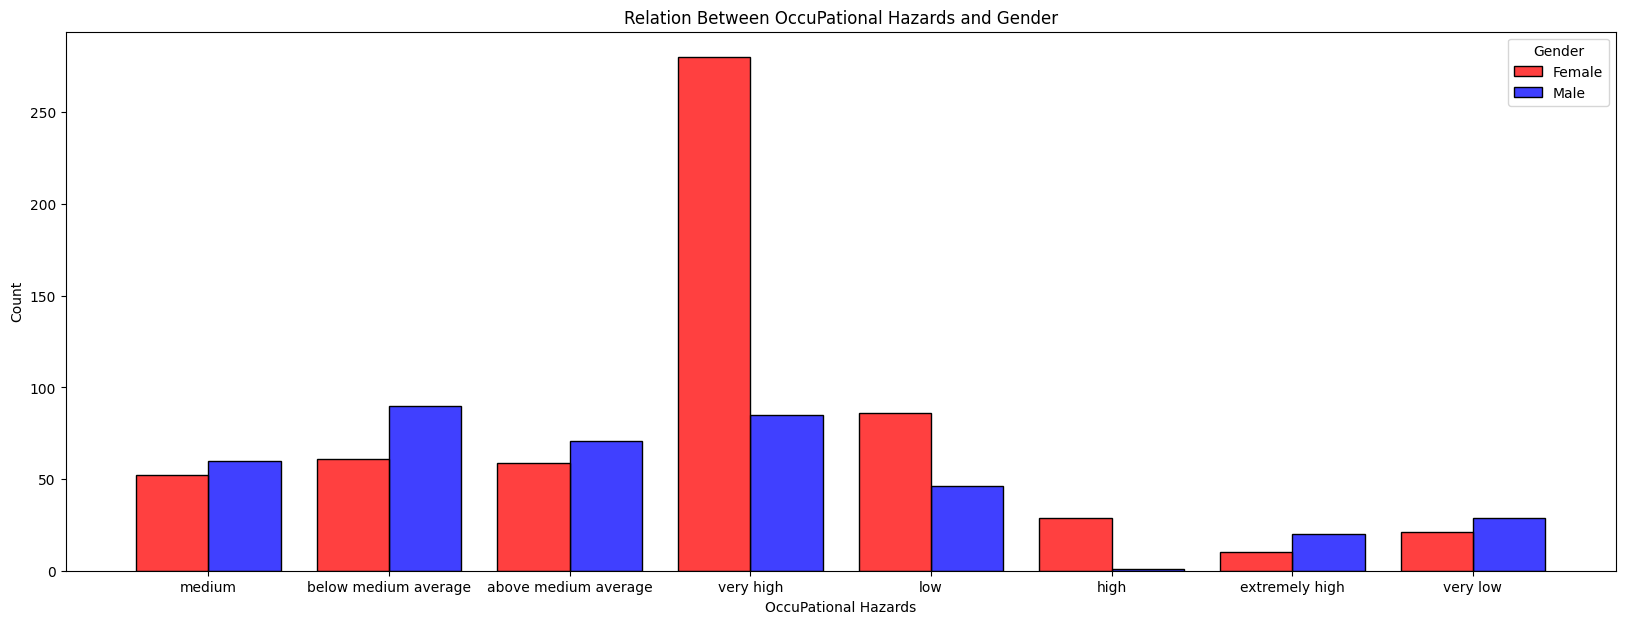

In [25]:
plt.subplots(figsize=(20, 7))

sns.histplot(data=df, x=df["OccuPational Hazards"], hue=df["Gender"], multiple="dodge", shrink=.8,palette=["red","blue"]).set(title='Relation Between OccuPational Hazards and Gender')

In [26]:
df.Gender.value_counts()

Gender
Female    598
Male      402
Name: count, dtype: int64

#### Smokers

<Axes: title={'center': 'Number of Passive Smokers'}, xlabel='Passive Smoker', ylabel='Count'>

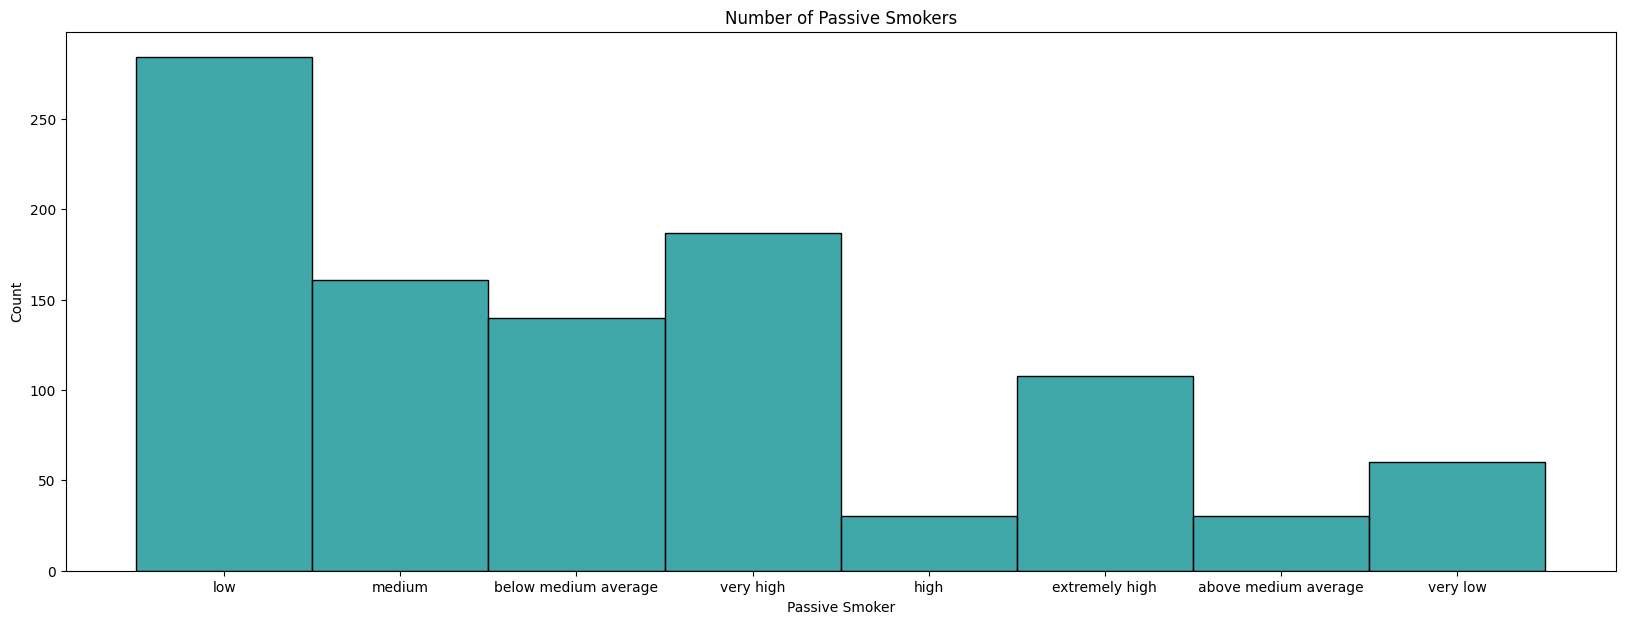

In [27]:
plt.subplots(figsize=(20, 7))
plt.title("Number of Passive Smokers")
sns.histplot(data=df, x=df["Passive Smoker"],color= "darkcyan")

#### Alcohol

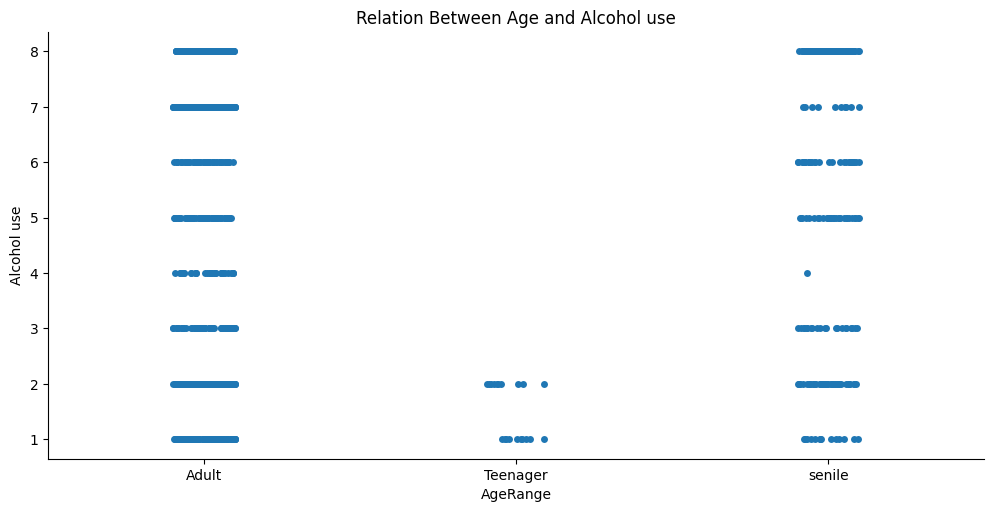

In [28]:
df3= df.copy()

df3['AgeRange'] = None
df3.loc[(df3['Age'] > 14) & (df3["Age"] < 18), 'AgeRange'] = "Teenager"
df3.loc[(df3['Age'] > 18) & (df3["Age"] < 45), 'AgeRange'] = "Adult"
df3.loc[(df3['Age'] > 45) & (df3["Age"] < 74), 'AgeRange'] = "senile"


sns.catplot(data=df3, x="AgeRange", y="Alcohol use",aspect=20/10,height=5).set(title='Relation Between Age and Alcohol use')

### Relation Genetic Risk and chronic Lung Disease 

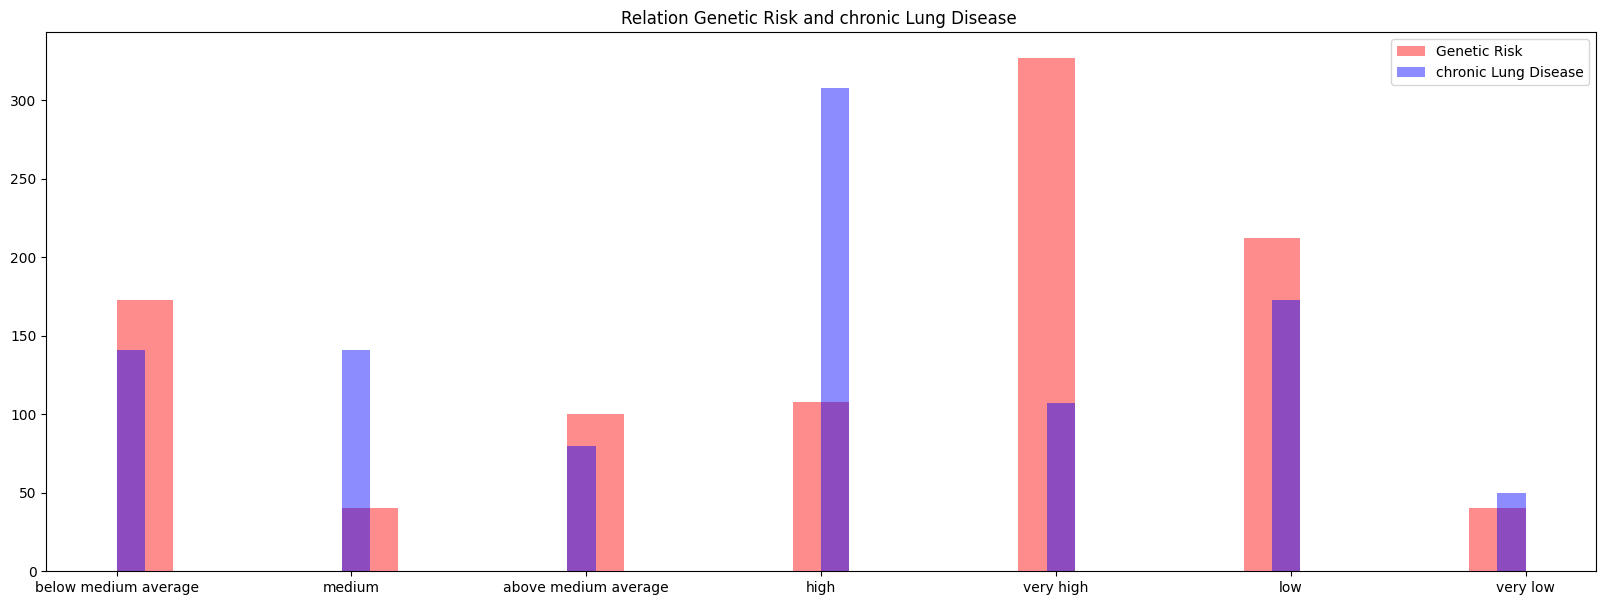

In [29]:
plt.subplots(figsize=(20, 7))

plt.hist(df['Genetic Risk'], bins=25, alpha=0.45, color='red')
plt.hist(df['chronic Lung Disease'], bins=50, alpha=0.45, color='blue')

plt.title("Relation Genetic Risk and chronic Lung Disease ")

  
plt.legend(['Genetic Risk', 'chronic Lung Disease'])

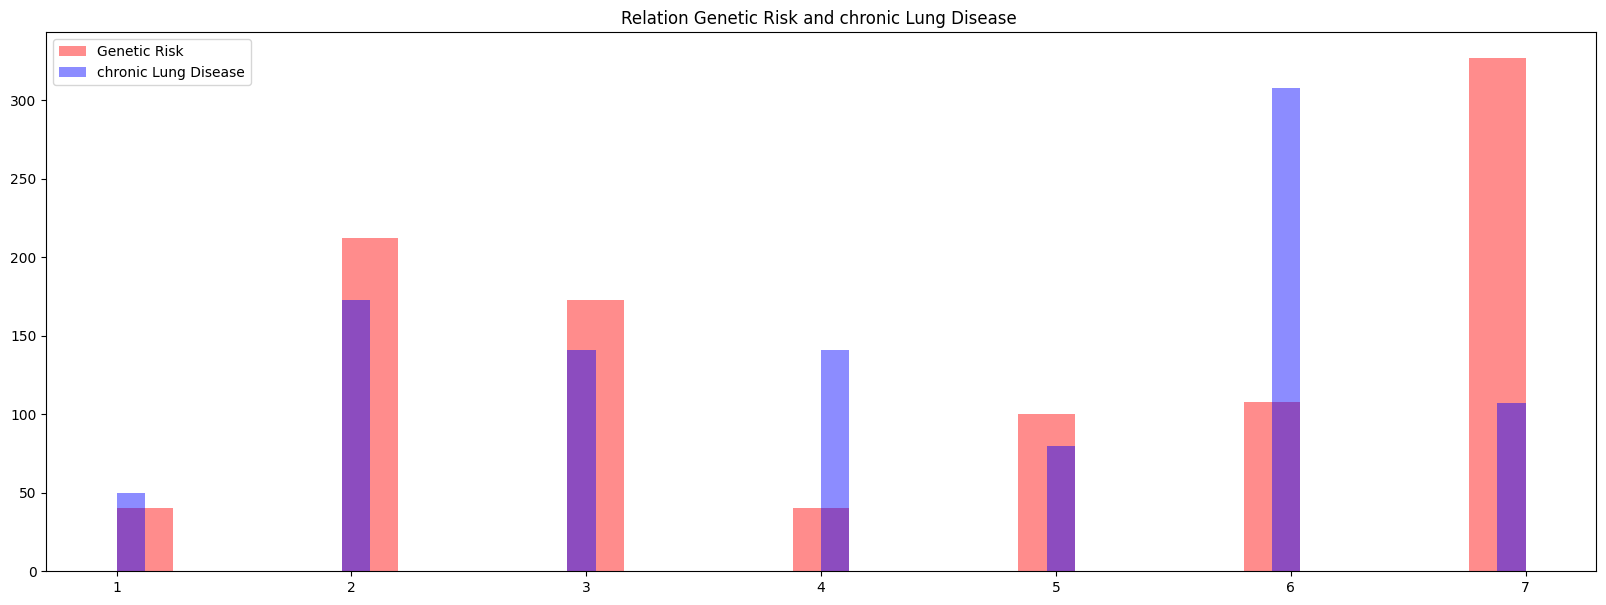

In [30]:
df6 = pd.read_csv("../Data/cancer_patient.csv", sep=",",encoding="UTF-8")

plt.subplots(figsize=(20, 7))

plt.hist(df6['Genetic Risk'], bins=25, alpha=0.45, color='red')
plt.hist(df6['chronic Lung Disease'], bins=50, alpha=0.45, color='blue')

plt.title("Relation Genetic Risk and chronic Lung Disease ")
  
plt.legend(['Genetic Risk', 
            'chronic Lung Disease'])

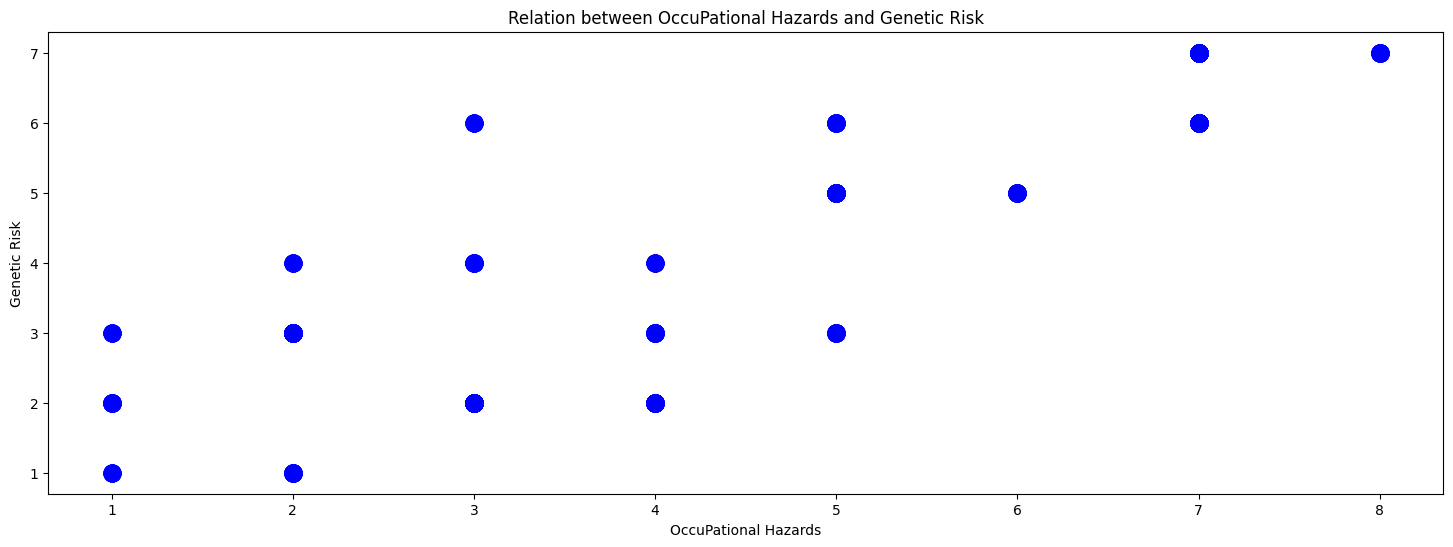

In [31]:
f = plt.figure(figsize=(18, 6))
plt.xlabel("OccuPational Hazards")
plt.ylabel("Genetic Risk")
plt.title("Relation between OccuPational Hazards and Genetic Risk")
plt.scatter(df6["OccuPational Hazards"],df6["Genetic Risk"],alpha=0.7,c="blue",linewidths=7)

### Relation between Obesity and Coughing of Blood

<Axes: title={'center': 'Relation between Obesity and Coughing of Blood'}, xlabel='Obesity', ylabel='Coughing of Blood'>

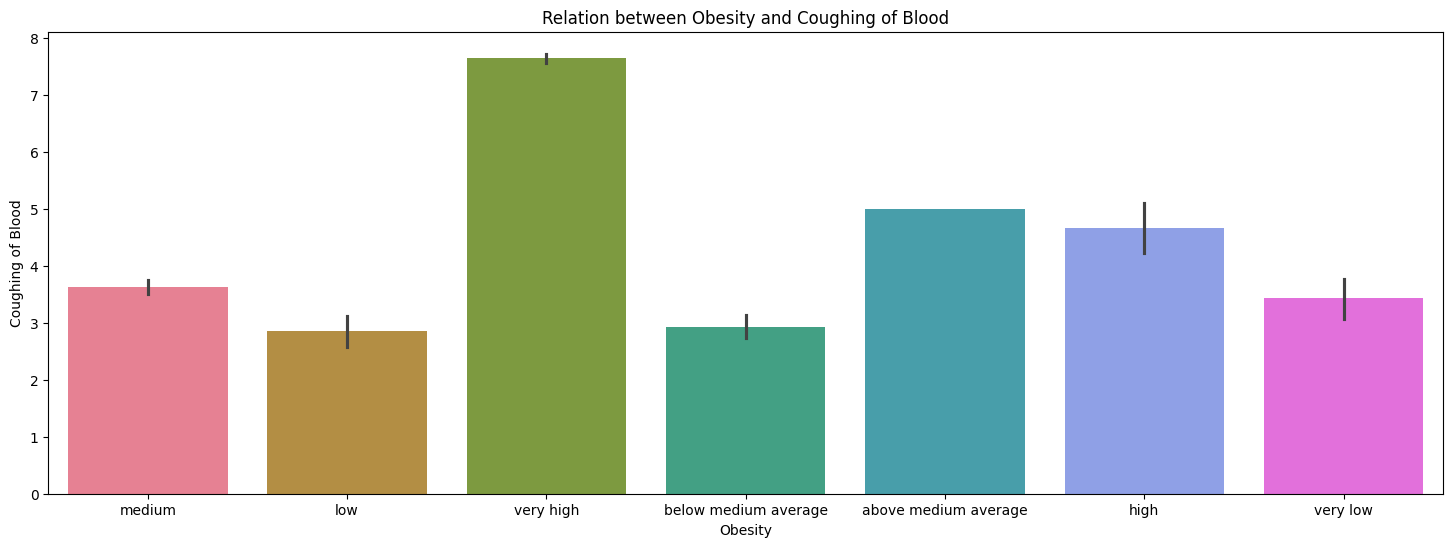

In [32]:
plt.figure(figsize=(18, 6))
plt.title("Relation between Obesity and Coughing of Blood")
sns.barplot(data=df, x="Obesity", y="Coughing of Blood",palette="husl")

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


<Axes: title={'center': 'Relation between Obesity and Coughing of Blood'}, xlabel='Obesity', ylabel='Coughing of Blood'>

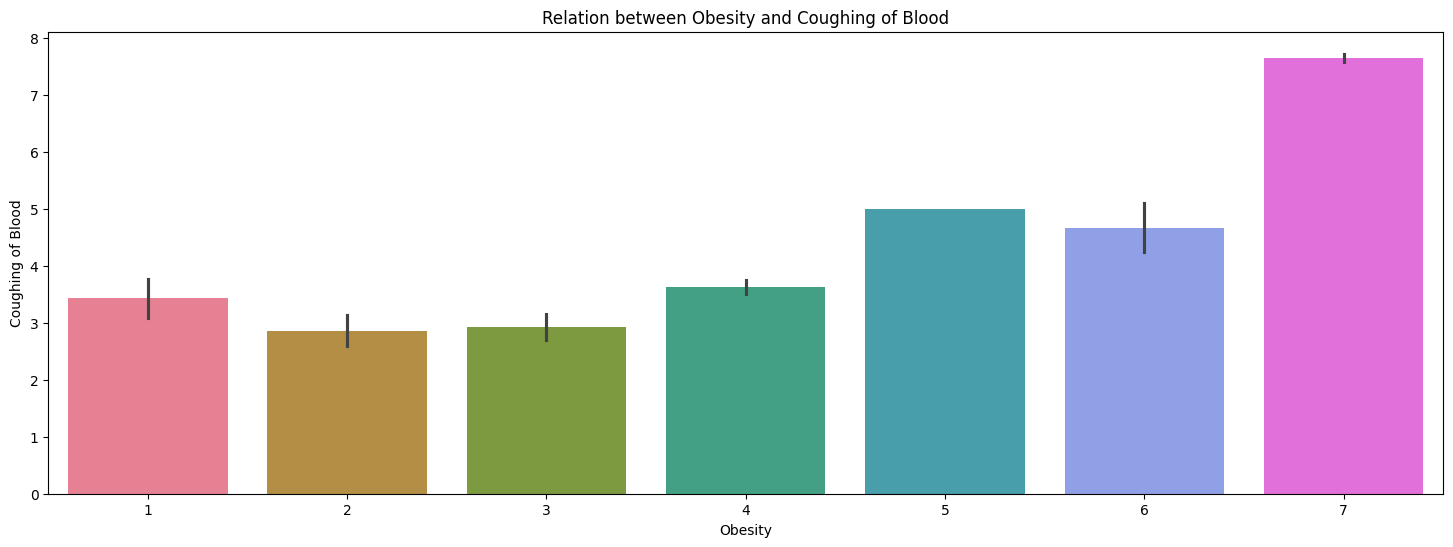

In [33]:
plt.figure(figsize=(18, 6))
plt.title("Relation between Obesity and Coughing of Blood")
sns.barplot(data=df6, x="Obesity", y="Coughing of Blood",palette="husl")

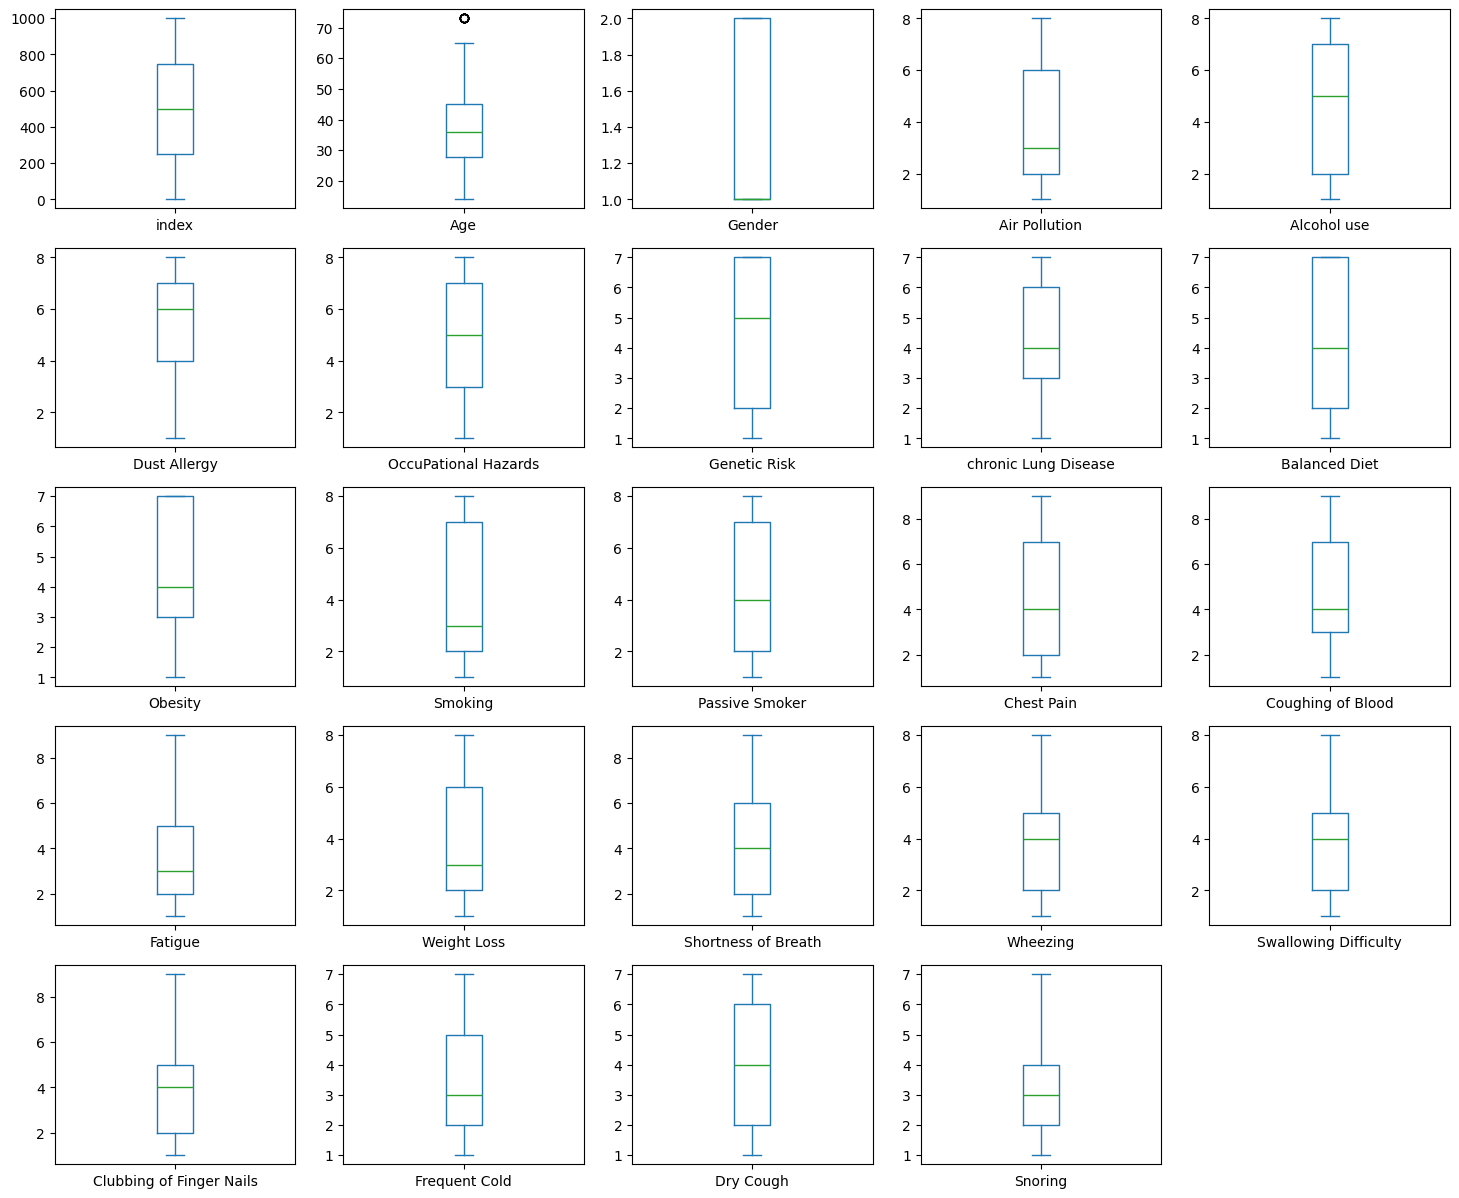

In [34]:
df6.plot(kind='box', subplots=True, layout=(5,5), figsize=(18,15))
plt.show()

<Axes: title={'center': 'Age Column Box Plot'}, xlabel='Age'>

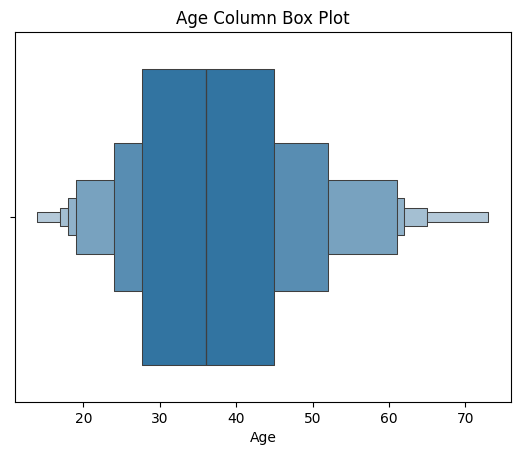

In [35]:
plt.title("Age Column Box Plot")
sns.boxenplot(x=df.Age)


In [36]:
df6.dtypes

index                        int64
Patient Id                  object
Age                          int64
Gender                       int64
Air Pollution                int64
Alcohol use                  int64
Dust Allergy                 int64
OccuPational Hazards         int64
Genetic Risk                 int64
chronic Lung Disease         int64
Balanced Diet                int64
Obesity                      int64
Smoking                      int64
Passive Smoker               int64
Chest Pain                   int64
Coughing of Blood            int64
Fatigue                      int64
Weight Loss                  int64
Shortness of Breath          int64
Wheezing                     int64
Swallowing Difficulty        int64
Clubbing of Finger Nails     int64
Frequent Cold                int64
Dry Cough                    int64
Snoring                      int64
Level                       object
dtype: object

## Encoding

In [37]:
le = LabelEncoder()

# transforming the datatype
df6['Level'] = le.fit_transform(df6['Level'])
df6['Patient Id'] = le.fit_transform(df6['Patient Id'])

In [38]:
df6.dtypes

index                       int64
Patient Id                  int64
Age                         int64
Gender                      int64
Air Pollution               int64
Alcohol use                 int64
Dust Allergy                int64
OccuPational Hazards        int64
Genetic Risk                int64
chronic Lung Disease        int64
Balanced Diet               int64
Obesity                     int64
Smoking                     int64
Passive Smoker              int64
Chest Pain                  int64
Coughing of Blood           int64
Fatigue                     int64
Weight Loss                 int64
Shortness of Breath         int64
Wheezing                    int64
Swallowing Difficulty       int64
Clubbing of Finger Nails    int64
Frequent Cold               int64
Dry Cough                   int64
Snoring                     int64
Level                       int64
dtype: object

In [39]:
x = df6.drop(["Level","Patient Id","index"],axis=1).values
y = df.Level.values

### Splitting the data

In [40]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [41]:
x_train

array([[28,  2,  1, ...,  7,  7,  5],
       [53,  1,  6, ...,  1,  7,  6],
       [28,  2,  1, ...,  7,  7,  5],
       ...,
       [36,  2,  2, ...,  3,  2,  3],
       [49,  1,  6, ...,  6,  7,  2],
       [49,  1,  6, ...,  6,  7,  2]])

In [42]:
x_test

array([[48,  2,  1, ...,  1,  2,  1],
       [62,  1,  6, ...,  3,  4,  2],
       [22,  1,  6, ...,  3,  4,  2],
       ...,
       [28,  1,  6, ...,  4,  5,  3],
       [44,  1,  2, ...,  3,  2,  3],
       [46,  2,  1, ...,  7,  7,  5]])

In [43]:
y_train

array(['Medium', 'High', 'Medium', 'Medium', 'Low', 'Low', 'Low', 'High',
       'Low', 'Low', 'Medium', 'High', 'Low', 'Low', 'High', 'High',
       'High', 'Medium', 'Medium', 'Low', 'Medium', 'High', 'High', 'Low',
       'Medium', 'High', 'High', 'High', 'Medium', 'High', 'High', 'High',
       'Low', 'High', 'Low', 'High', 'Medium', 'Medium', 'Medium', 'High',
       'High', 'High', 'Medium', 'High', 'Medium', 'High', 'High',
       'Medium', 'Medium', 'Medium', 'Medium', 'High', 'Medium', 'Low',
       'Medium', 'Low', 'Medium', 'High', 'Low', 'High', 'Medium', 'High',
       'High', 'Low', 'Low', 'High', 'High', 'Low', 'Medium', 'Low',
       'Medium', 'Low', 'Medium', 'High', 'Medium', 'Medium', 'Medium',
       'Low', 'Medium', 'Low', 'Medium', 'High', 'High', 'Low', 'High',
       'Low', 'Medium', 'High', 'High', 'Low', 'Low', 'Medium', 'Medium',
       'High', 'Medium', 'Low', 'Low', 'High', 'Low', 'Low', 'High',
       'High', 'Low', 'High', 'Low', 'Low', 'Medium', 'High', 

In [44]:
y_test

array(['Medium', 'Medium', 'Medium', 'High', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'Medium',
       'Low', 'High', 'Low', 'High', 'High', 'High', 'High', 'Medium',
       'Low', 'Medium', 'High', 'Low', 'Medium', 'High', 'Low', 'Low',
       'Low', 'High', 'Medium', 'Low', 'Low', 'High', 'High', 'Medium',
       'High', 'Low', 'High', 'High', 'Low', 'Medium', 'Medium', 'Low',
       'Low', 'Medium', 'High', 'Low', 'Medium', 'High', 'Low', 'High',
       'High', 'High', 'Low', 'High', 'High', 'Low', 'Medium', 'Low',
       'High', 'High', 'Low', 'Medium', 'High', 'High', 'Medium', 'High',
       'High', 'Low', 'Medium', 'Medium', 'Medium', 'Medium', 'High',
       'Low', 'Low', 'Medium', 'Medium', 'Medium', 'Low', 'Medium',
       'High', 'High', 'High', 'Low', 'High', 'High', 'Low', 'Low',
       'Medium', 'High', 'High', 'High', 'High', 'High', 'Medium', 'Low',
       'Low', 'High', 'Low', 'Low', 'Medium', 'High', 'High', 'Medium

In [45]:
s_scaler = StandardScaler().fit(x_train)
x_train_scaled = s_scaler.transform(x_train)
x_test_scaled = s_scaler.transform(x_test)

In [46]:
def resultsSummarizer(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    
    
    plt.figure(figsize=(10,8))
    
    sns.heatmap(cm,
                annot=True,
                cmap='Blues',
                xticklabels=labels.values(),
                yticklabels=labels.values()
               ) 
    
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Activity')
    plt.ylabel('Actual Activity')
    plt.show()
    
    print(f'Accuracy Score: ' + '{:.4%}'.format(acc))
    print(f'Precision Score: ' + '{:.4%}'.format(prec))
    print(f'Recall Score: ' + '{:.4%}'.format(rec))
    print(f'F_1 Score: ' + '{:.4%}'.format(f1))

## Logistic Regression

In [47]:
lr = LogisticRegression()
lr.fit(x_train , y_train)

LogisticRegression()

In [48]:
lr.score(x_train , y_train)

0.99875

In [49]:
lr.score(x_test , y_test)

0.995

In [50]:
y_pred=lr.predict(x_test)
data=pd.DataFrame({'y_Test  ':y_test,'y_pred  ':y_pred})
data[:20]

,y_Test,y_pred
0,Medium,Medium
1,Medium,Medium
2,Medium,Medium
3,High,High
4,Medium,Medium
5,Medium,Medium
6,Medium,Medium
7,Medium,Medium
8,Medium,Medium
9,Medium,Medium


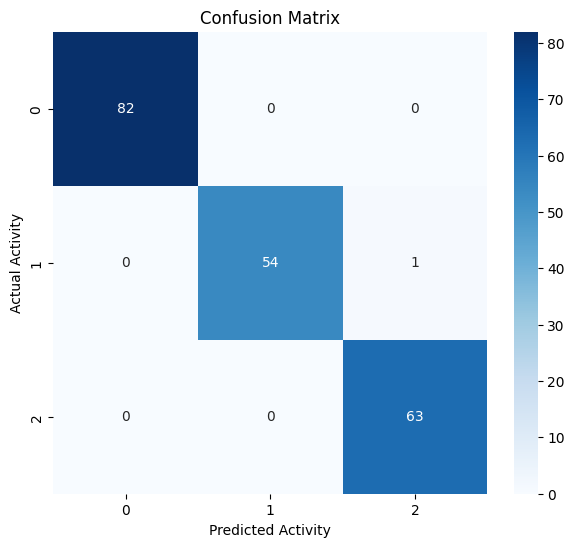

In [51]:
plt.figure(figsize=(7, 6)) 
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True, cmap='Blues') 
plt.title('Confusion Matrix')
plt.xlabel('Predicted Activity')
plt.ylabel('Actual Activity')
plt.show()


## KNN

In [52]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [53]:
knn.score(x_train,y_train)

0.99875

In [54]:
knn.score(x_test,y_test)

0.995

In [55]:
y_pred=knn.predict(x_test)
data=pd.DataFrame({'y_Test  ':y_test,'y_pred  ':y_pred})
data[:20]

,y_Test,y_pred
0,Medium,Medium
1,Medium,Medium
2,Medium,Medium
3,High,High
4,Medium,Medium
5,Medium,Medium
6,Medium,Medium
7,Medium,Medium
8,Medium,Medium
9,Medium,Medium


In [56]:
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(x_train_scaled, y_train)
y_pred_knn = knn2.predict(x_test_scaled)

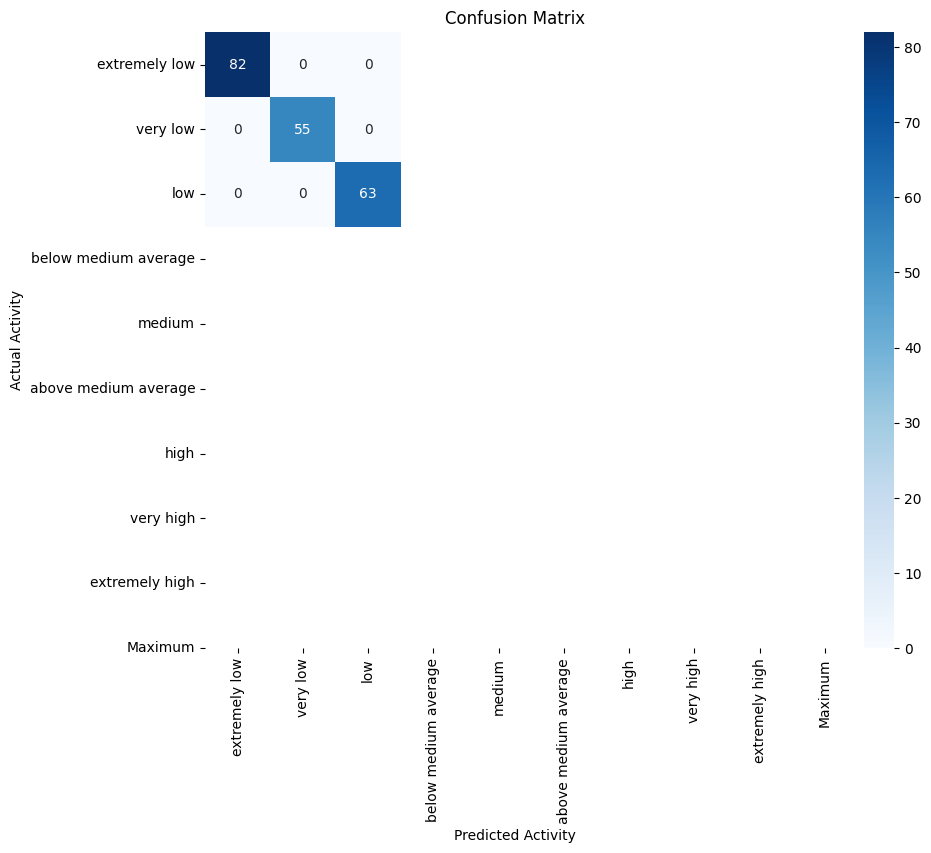

Accuracy Score: 100.0000%
Precision Score: 100.0000%
Recall Score: 100.0000%
F_1 Score: 100.0000%


In [57]:
resultsSummarizer(y_test, y_pred_knn)

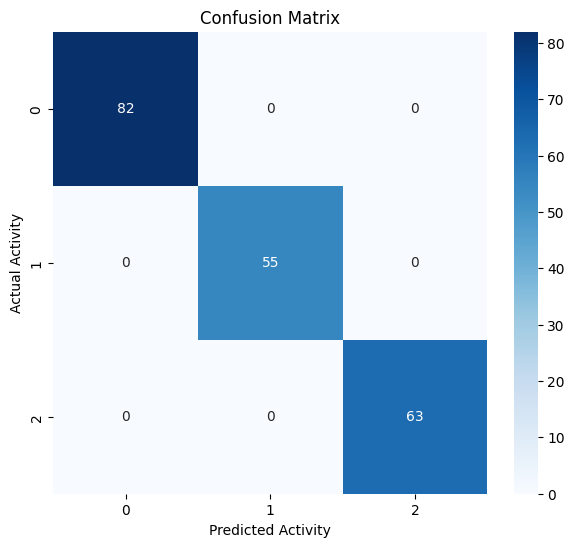

In [58]:
plt.figure(figsize=(7, 6)) 
cm=confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm,annot=True, cmap='Blues') 
plt.title('Confusion Matrix')
plt.xlabel('Predicted Activity')
plt.ylabel('Actual Activity')
plt.show()

## Random Forest

In [59]:
rfst = RandomForestClassifier(n_estimators=10,random_state=42)
rfst.fit(x_train_scaled, y_train)
y_pred_rfst = rfst.predict(x_test_scaled)

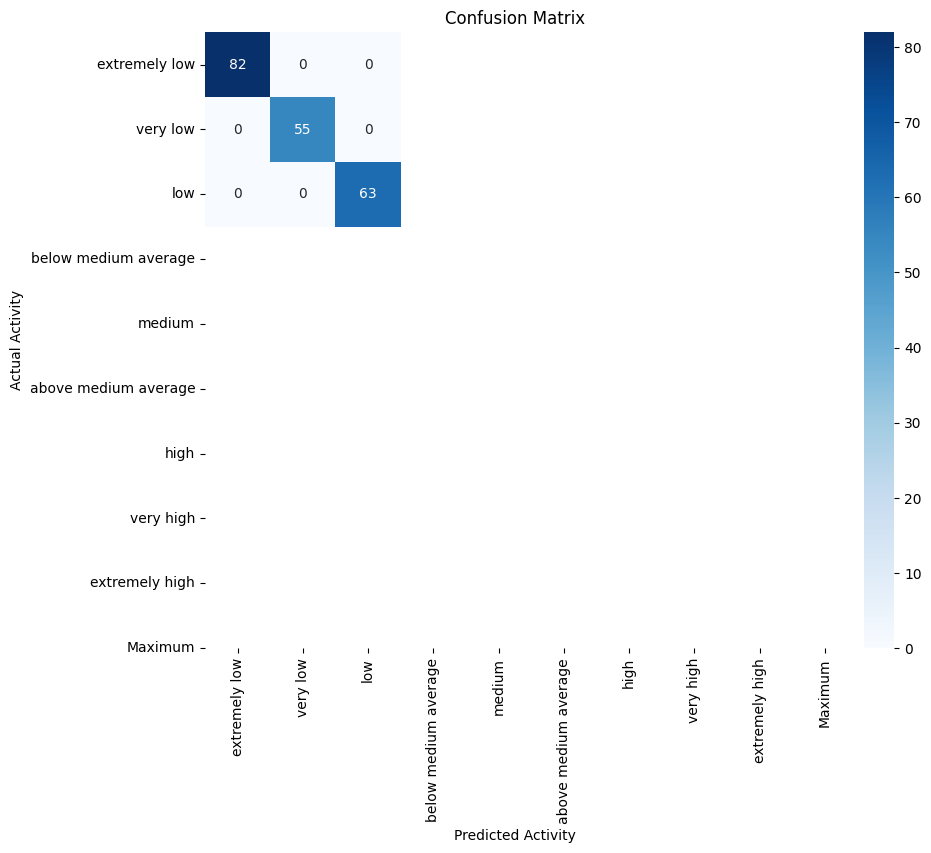

Accuracy Score: 100.0000%
Precision Score: 100.0000%
Recall Score: 100.0000%
F_1 Score: 100.0000%


In [60]:
resultsSummarizer(y_pred_rfst, y_test)

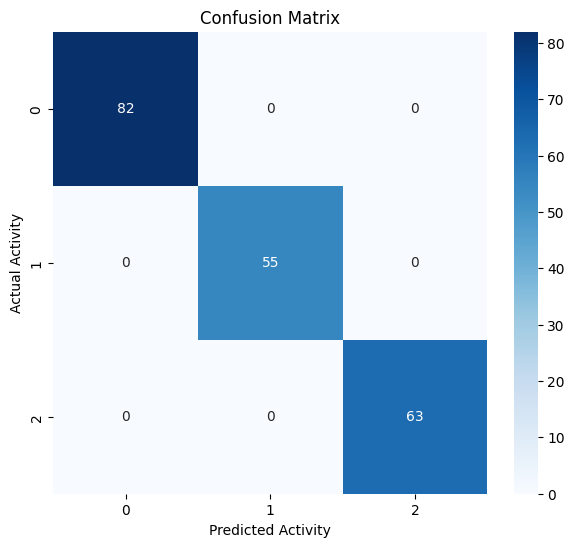

In [61]:
plt.figure(figsize=(7, 6)) 
cm=confusion_matrix(y_test, y_pred_rfst)
sns.heatmap(cm,annot=True, cmap='Blues') 
plt.title('Confusion Matrix')
plt.xlabel('Predicted Activity')
plt.ylabel('Actual Activity')
plt.show()


## Grid Search

In [62]:
C_grid = 0.02*np.arange(1,20)
gamma_grid = 0.02*np.arange(1,50)
print(C_grid,gamma_grid)
parameters = {'C': C_grid, 'gamma' : gamma_grid}
gridCV = GridSearchCV(SVC(kernel='rbf'), parameters, n_jobs=-1)             
gridCV.fit(x_train[:1000],y_train[:1000])
best_C = gridCV.best_params_['C']
best_gamma = gridCV.best_params_['gamma']

print("Best C "+str(best_C))
print("Best Gamma "+str(best_gamma))

[0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26 0.28
 0.3  0.32 0.34 0.36 0.38] [0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26 0.28
 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54 0.56
 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82 0.84
 0.86 0.88 0.9  0.92 0.94 0.96 0.98]
Best C 0.12
Best Gamma 0.02


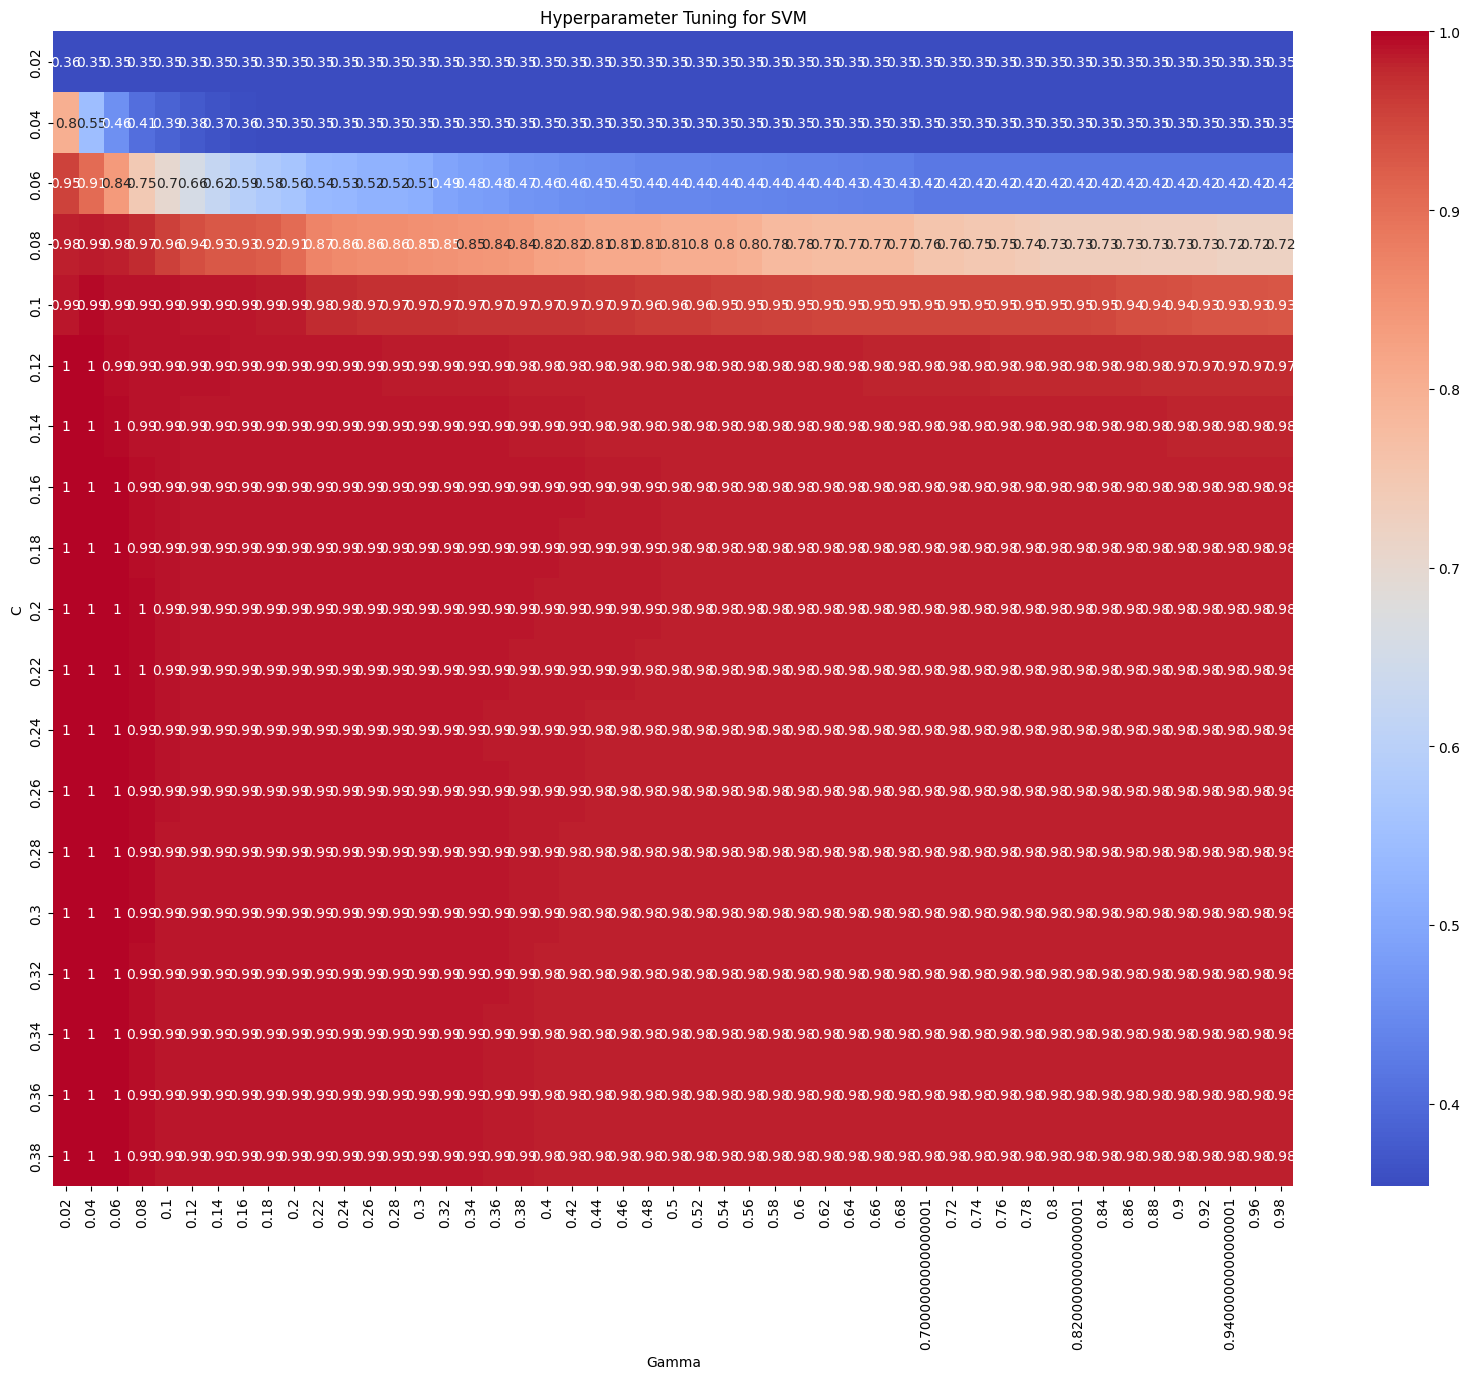

In [63]:
results = gridCV.cv_results_
scores = results['mean_test_score'].reshape(len(C_grid), len(gamma_grid))

plt.figure(figsize=(20, 15))
sns.heatmap(scores, annot=True, cmap='coolwarm', xticklabels=gamma_grid, yticklabels=C_grid)
plt.title('Hyperparameter Tuning for SVM')
plt.xlabel('Gamma')
plt.ylabel('C')
plt.show()

## SVM

In [64]:
## Linear Kernel
lin = SVC(kernel='linear',C=best_C,gamma=best_gamma)
lin.fit(x_train, y_train)

SVC(C=np.float64(0.12), gamma=np.float64(0.02), kernel='linear')

In [65]:
y_pred_Linear = lin.predict(x_test)
print(classification_report(y_test, y_pred_Linear))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00        82
         Low       1.00      1.00      1.00        55
      Medium       1.00      1.00      1.00        63

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



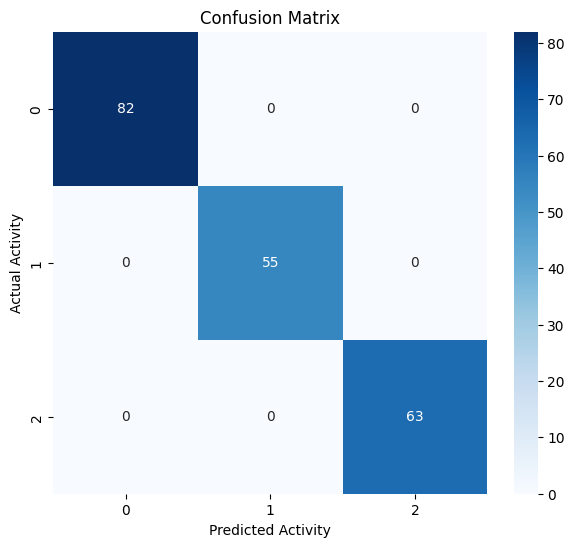

In [66]:
plt.figure(figsize=(7, 6)) 
cm=confusion_matrix(y_test, y_pred_Linear)
sns.heatmap(cm,annot=True, cmap='Blues') 
plt.title('Confusion Matrix')
plt.xlabel('Predicted Activity')
plt.ylabel('Actual Activity')
plt.show()

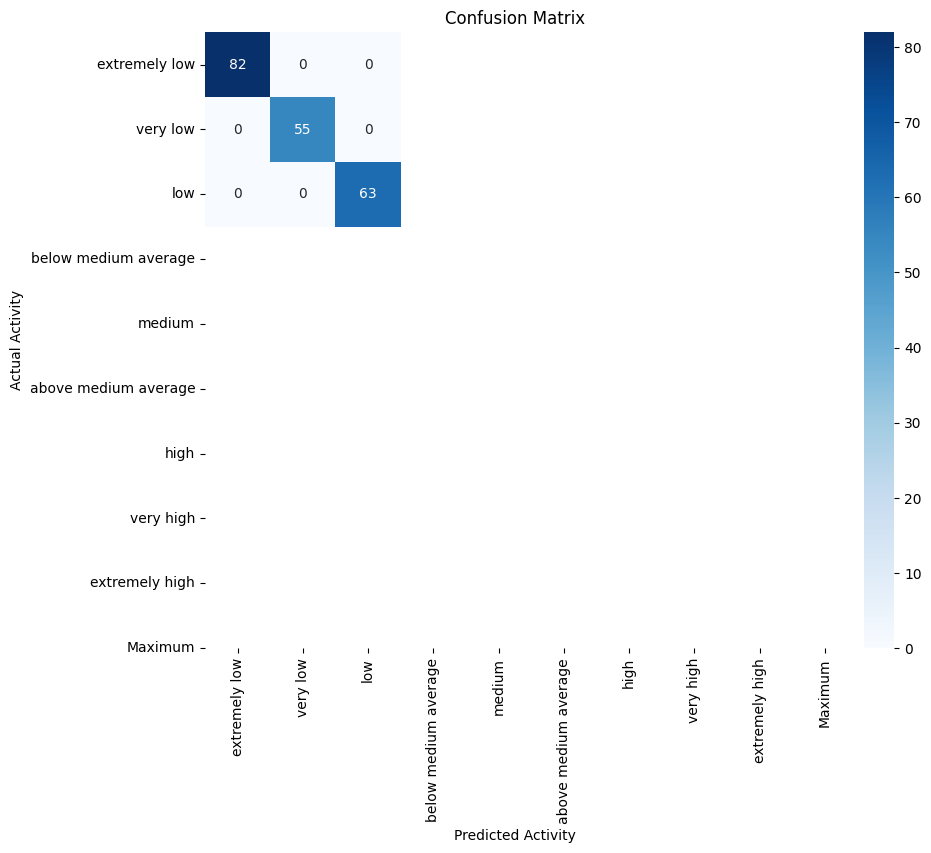

Accuracy Score: 100.0000%
Precision Score: 100.0000%
Recall Score: 100.0000%
F_1 Score: 100.0000%


In [67]:
resultsSummarizer(y_pred_Linear, y_test)

In [68]:
# RBF Kernel
rbf = SVC(kernel='rbf',C=1,gamma=0.6)
rbf.fit(x_train, y_train)

y_pred_RBF = rbf.predict(x_test)
print(classification_report(y_test, y_pred_RBF))

              precision    recall  f1-score   support

        High       1.00      0.99      0.99        82
         Low       1.00      0.96      0.98        55
      Medium       0.95      1.00      0.98        63

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.99      0.98      0.99       200



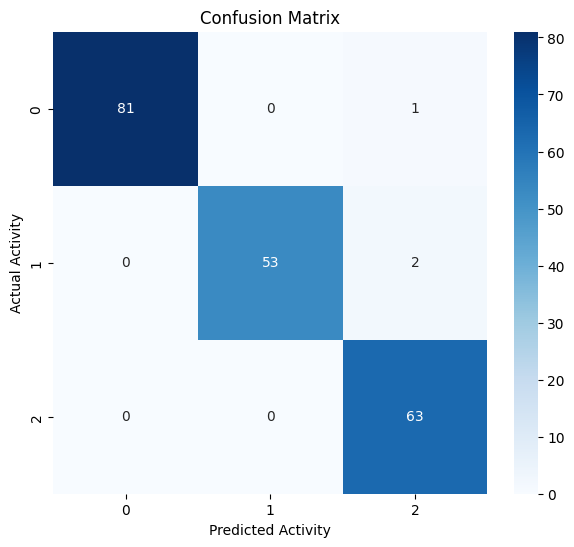

In [69]:
plt.figure(figsize=(7, 6)) 
cm=confusion_matrix(y_test, y_pred_RBF)
sns.heatmap(cm,annot=True, cmap='Blues') 
plt.title('Confusion Matrix')
plt.xlabel('Predicted Activity')
plt.ylabel('Actual Activity')
plt.show()

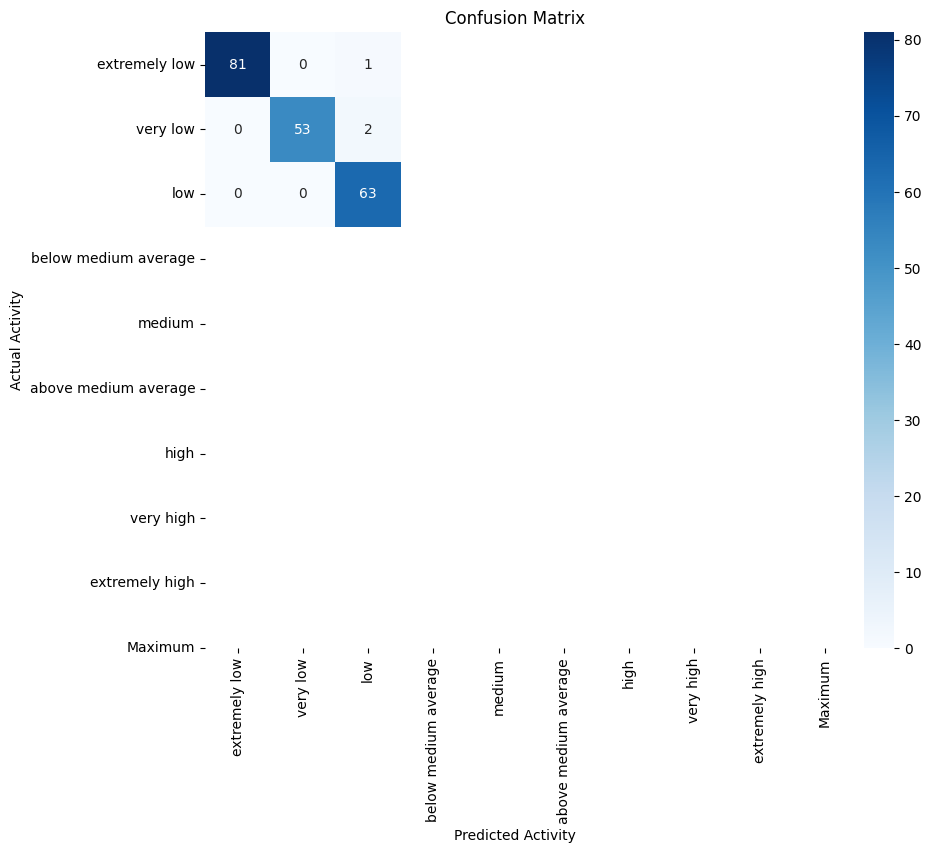

Accuracy Score: 98.5000%
Precision Score: 98.4848%
Recall Score: 98.3814%
F_1 Score: 98.4030%


In [70]:
resultsSummarizer(y_test, y_pred_RBF)

## Naive Bayes
### Gaussian Naive Bayes

In [71]:
# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Train the model on the training data
nb_model.fit(x_train, y_train)

# Predict on the test data
y_pred_gnb = nb_model.predict(x_test)

Naive Bayes Performance Metrics:
Accuracy: 0.895

Classification Report:
               precision    recall  f1-score   support

        High       0.87      0.96      0.91        82
         Low       1.00      0.85      0.92        55
      Medium       0.85      0.84      0.85        63

    accuracy                           0.90       200
   macro avg       0.91      0.89      0.89       200
weighted avg       0.90      0.90      0.90       200



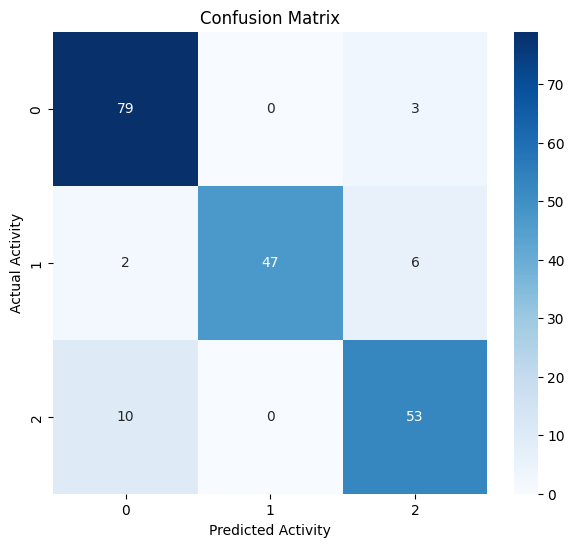

In [72]:
# Evaluate the model
print("Naive Bayes Performance Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_gnb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gnb))

plt.figure(figsize=(7, 6)) 
cm=confusion_matrix(y_test, y_pred_gnb)
sns.heatmap(cm,annot=True, cmap='Blues') 
plt.title('Confusion Matrix')
plt.xlabel('Predicted Activity')
plt.ylabel('Actual Activity')
plt.show()

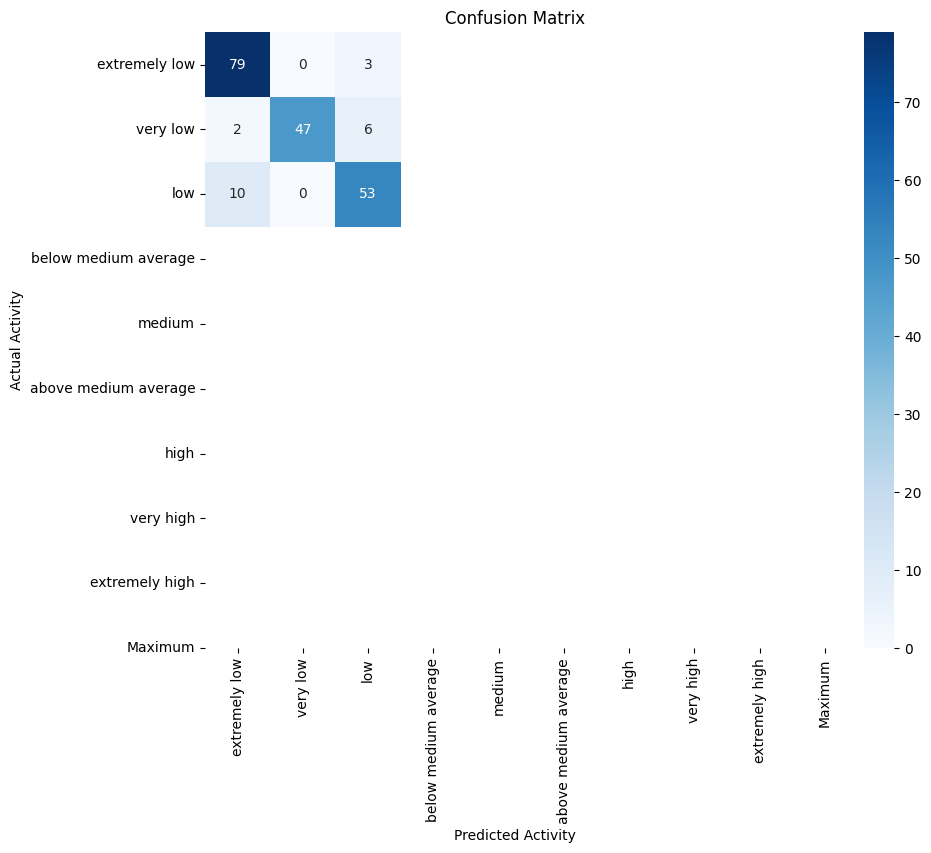

Accuracy Score: 89.5000%
Precision Score: 90.7657%
Recall Score: 88.6410%
F_1 Score: 89.4288%


In [73]:
resultsSummarizer(y_test, y_pred_gnb)

### Categorical Naive Bayes

In [74]:
# Initialize the Categorical Naive Bayes model
nb_model_cat = CategoricalNB()

# Train the model on the training data
nb_model_cat.fit(x_train, y_train)

# Predict on the test data
y_pred_cnb = nb_model_cat.predict(x_test)

Categorical Naive Bayes Performance Metrics:
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00        82
         Low       1.00      1.00      1.00        55
      Medium       1.00      1.00      1.00        63

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



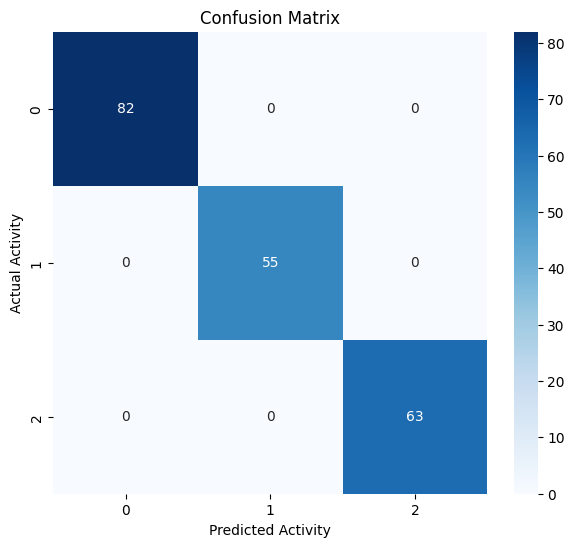

In [75]:
# Evaluate the model
print("Categorical Naive Bayes Performance Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_cnb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_cnb))

# Confusion Matrix
plt.figure(figsize=(7, 6))
cm = confusion_matrix(y_test, y_pred_cnb)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Activity')
plt.ylabel('Actual Activity')
plt.show()

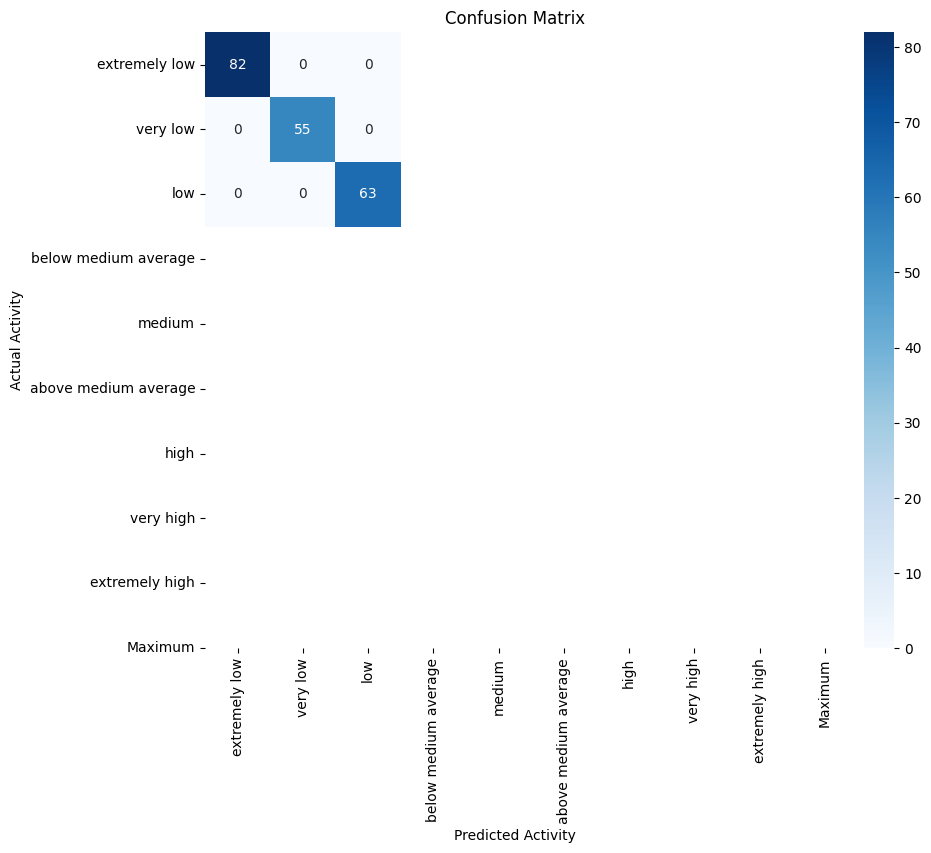

Accuracy Score: 100.0000%
Precision Score: 100.0000%
Recall Score: 100.0000%
F_1 Score: 100.0000%


In [76]:
resultsSummarizer(y_test, y_pred_cnb)

## Bayesian Network

In [77]:
# Prepare training data
train_data = pd.DataFrame(x_train, columns=[
    "Age", "Gender", "Air Pollution", "Alcohol use", "Dust Allergy",
    "OccuPational Hazards", "Genetic Risk", "chronic Lung Disease",
    "Balanced Diet", "Obesity", "Smoking", "Passive Smoker", "Chest Pain",
    "Coughing of Blood", "Fatigue", "Weight Loss", "Shortness of Breath",
    "Wheezing", "Swallowing Difficulty", "Clubbing of Finger Nails",
    "Frequent Cold", "Dry Cough", "Snoring"
])
train_data['Level'] = y_train  # Add the target variable

# Use HillClimbSearch to learn the Bayesian Network structure
hc = HillClimbSearch(train_data)
best_model = hc.estimate(scoring_method=BicScore(train_data))

# Print the learned network structure
print("Learned Network Structure:")
print(best_model.edges())

  0%|          | 24/1000000 [00:00<8:04:34, 34.39it/s]

Learned Network Structure:
[('Alcohol use', 'Air Pollution'), ('Alcohol use', 'OccuPational Hazards'), ('Alcohol use', 'Dust Allergy'), ('Alcohol use', 'Chest Pain'), ('Alcohol use', 'Passive Smoker'), ('Alcohol use', 'Smoking'), ('Alcohol use', 'Gender'), ('OccuPational Hazards', 'Balanced Diet'), ('Genetic Risk', 'Alcohol use'), ('Genetic Risk', 'Coughing of Blood'), ('chronic Lung Disease', 'Genetic Risk'), ('Balanced Diet', 'Obesity'), ('Passive Smoker', 'Level'), ('Coughing of Blood', 'Shortness of Breath'), ('Coughing of Blood', 'Wheezing'), ('Fatigue', 'Snoring'), ('Fatigue', 'Weight Loss'), ('Shortness of Breath', 'Fatigue'), ('Shortness of Breath', 'Clubbing of Finger Nails'), ('Wheezing', 'Swallowing Difficulty'), ('Clubbing of Finger Nails', 'Frequent Cold'), ('Frequent Cold', 'Dry Cough'), ('Level', 'Age'), ('Level', 'Dry Cough')]


In [78]:
# Initialize the Bayesian Network model using the learned structure
model = BayesianNetwork(best_model.edges())

# Train the Bayesian Network with Maximum Likelihood Estimation
model.fit(train_data, estimator=MaximumLikelihoodEstimator)

# Prepare test data
test_data = pd.DataFrame(x_test, columns=[
    "Age", "Gender", "Air Pollution", "Alcohol use", "Dust Allergy",
    "OccuPational Hazards", "Genetic Risk", "chronic Lung Disease",
    "Balanced Diet", "Obesity", "Smoking", "Passive Smoker", "Chest Pain",
    "Coughing of Blood", "Fatigue", "Weight Loss", "Shortness of Breath",
    "Wheezing", "Swallowing Difficulty", "Clubbing of Finger Nails",
    "Frequent Cold", "Dry Cough", "Snoring"
])

# Initialize Variable Elimination for inference
inference = VariableElimination(model)

# Predict the target variable for the test data
y_pred_bn = []
for _, row in test_data.iterrows():
    # Filter evidence to include only nodes present in the network
    valid_nodes = set(model.nodes())
    filtered_row = {k: v for k, v in row.to_dict().items() if k in valid_nodes}
    pred = inference.map_query(variables=['Level'], evidence=filtered_row)
    y_pred_bn.append(pred['Level'])

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it

Bayesian Network Performance Metrics:
Accuracy: 0.94

Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00        82
         Low       1.00      0.78      0.88        55
      Medium       0.84      1.00      0.91        63

    accuracy                           0.94       200
   macro avg       0.95      0.93      0.93       200
weighted avg       0.95      0.94      0.94       200



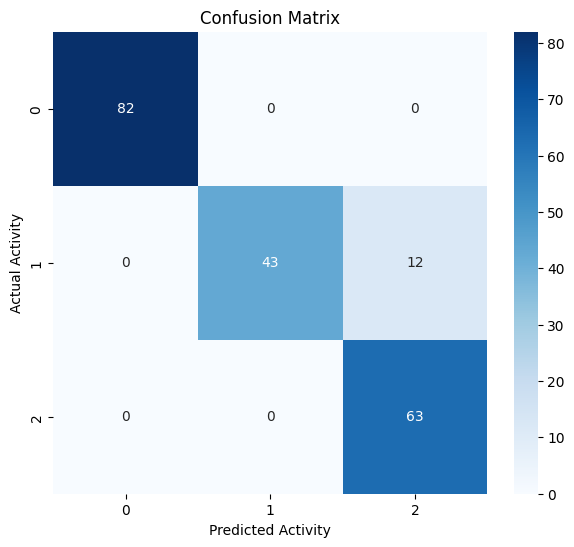

In [79]:
# Evaluate the model
print("Bayesian Network Performance Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_bn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_bn))

# Confusion Matrix
plt.figure(figsize=(7, 6))
cm = confusion_matrix(y_test, y_pred_bn)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Activity')
plt.ylabel('Actual Activity')
plt.show()

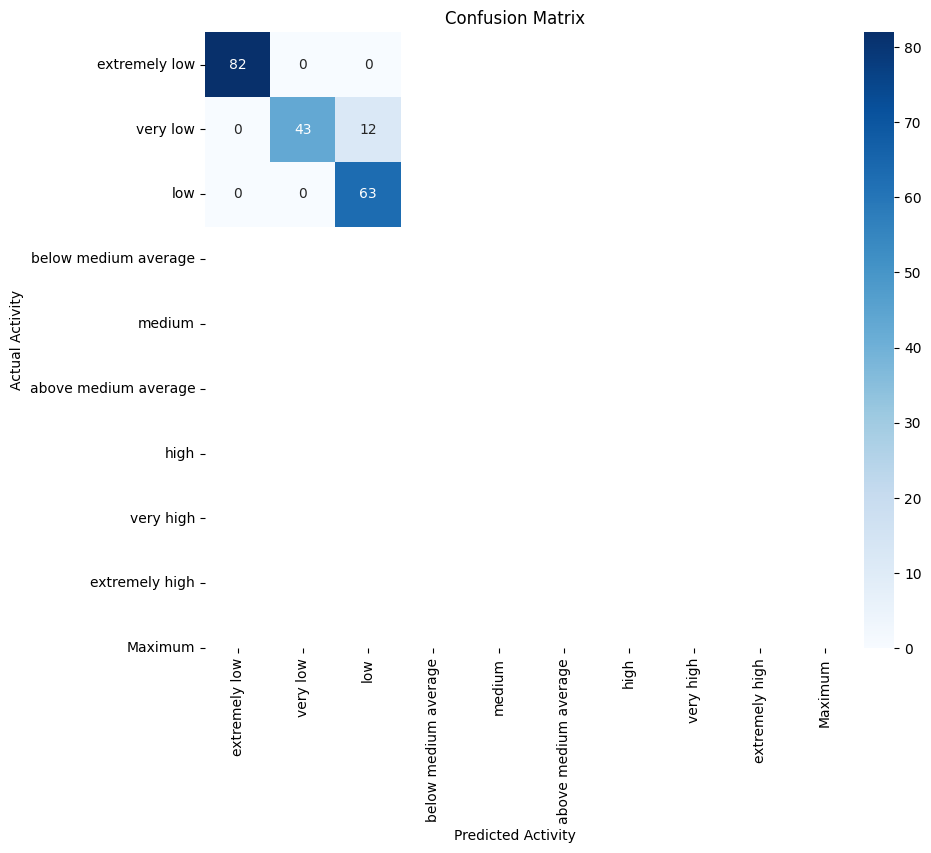

Accuracy Score: 94.0000%
Precision Score: 94.6667%
Recall Score: 92.7273%
F_1 Score: 93.0198%


In [80]:
resultsSummarizer(y_test, y_pred_bn)

# Deep Learning

In [81]:
df10 = pd.read_csv("../Data/cancer_patient.csv", sep=",",encoding="UTF-8")
df10.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [82]:
df10.Level = df10.Level.replace("Low", 0)
df10.Level = df10.Level.replace("Medium", 1)
df10.Level = df10.Level.replace("High", 2)
df10.Level = df10.Level.astype("int64")

In [83]:
x = df10.drop(["Level","Patient Id","index"], axis = 1)
y = pd.get_dummies(df["Level"])

In [84]:
model = Sequential()

model.add(Dense(8, activation = "relu", input_dim = x.shape[1]))
model.add(Dense(16, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(8, activation = "relu"))
model.add(Dense(3, activation = "softmax"))


model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(x, y, epochs = 50, validation_split = 0.3)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2948 - loss: 3.8486 - val_accuracy: 0.3133 - val_loss: 1.3711
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3245 - loss: 2.0899 - val_accuracy: 0.3867 - val_loss: 1.0629
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3608 - loss: 1.5138 - val_accuracy: 0.4733 - val_loss: 0.9532
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4376 - loss: 1.2362 - val_accuracy: 0.5167 - val_loss: 0.9418
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4483 - loss: 1.1897 - val_accuracy: 0.5033 - val_loss: 0.8817
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4874 - loss: 1.0104 - val_accuracy: 0.5800 - val_loss: 0.8451
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4814 - loss: 0.9732 - val_accuracy: 0.5867 - val_loss: 0.8075
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5174 - loss: 0.9344 - val_accuracy: 0.5900 - val_loss:

In [85]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,499 (5.86 KB)

 Trainable params: 499 (1.95 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,000 (3.91 KB)

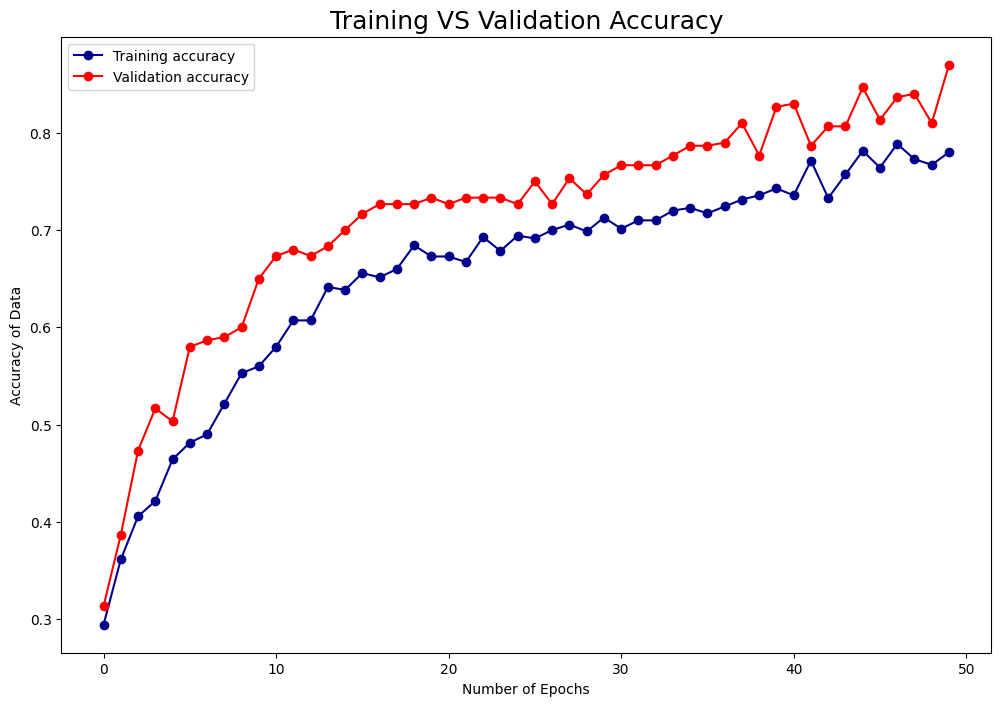

In [86]:
plt.figure(figsize = (12,8))
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy of Data")
plt.plot(history.history["accuracy"], label = "Training accuracy", marker = "o", color = "darkblue",)
plt.plot(history.history["val_accuracy"],label = "Validation accuracy", marker = "o",color = "r",)
plt.title("Training VS Validation Accuracy", fontsize = 18)
plt.legend()
plt.show()

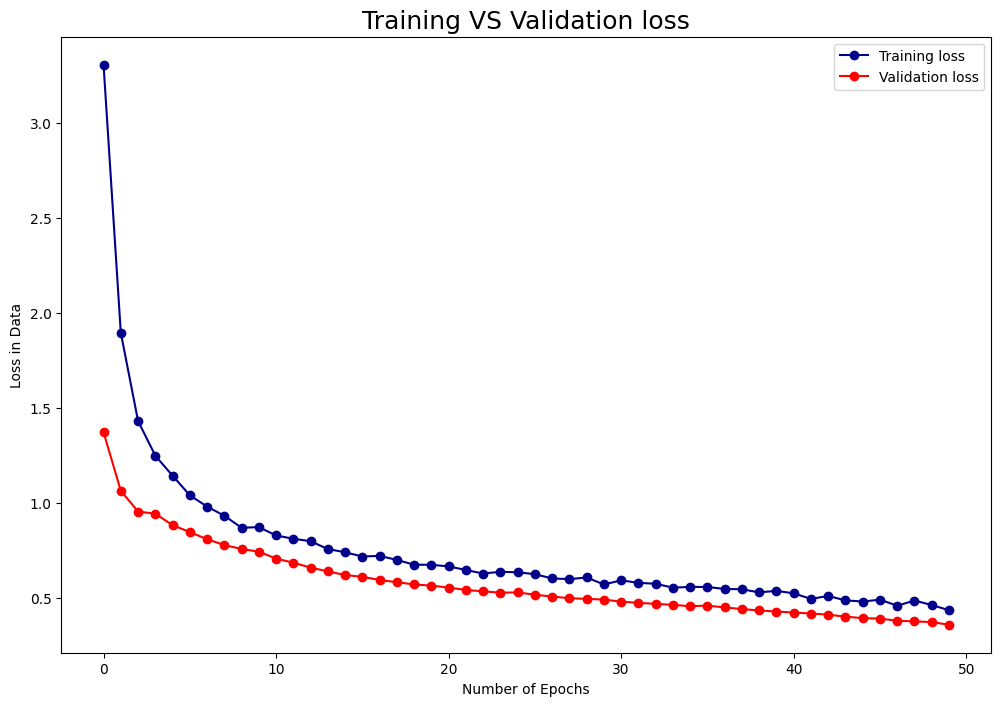

In [87]:
plt.figure(figsize = (12,8))
plt.xlabel("Number of Epochs")
plt.ylabel("Loss in Data")
plt.plot(history.history["loss"], label= "Training loss", marker = "o", color = "darkblue",)
plt.plot(history.history["val_loss"], label= "Validation loss", marker = "o", color = "r",)
plt.title("Training VS Validation loss", fontsize = 18)
plt.legend()
plt.show()

## ANN

In [88]:
df11 = pd.read_csv("../Data/cancer_patient.csv", sep=",",encoding="UTF-8")
df11.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [89]:
df11 = df11.drop(columns=['index', 'Patient Id'])

In [90]:
le = LabelEncoder()
df11['Level'] = le.fit_transform(df11['Level'])

In [91]:
X11 = df11.drop(columns=['Level'])
Y11 = df11['Level']

In [92]:
scaler1 = StandardScaler()
X11 = scaler1.fit_transform(X11)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X11, Y11, test_size=0.2, random_state=42)

In [94]:
def preprocess_data(df):
    # Drop unnecessary columns
    columns_to_drop = ['index', 'Patient Id']
    X = df.drop(columns_to_drop + ['Level'], axis=1)
    
    # Convert Gender to numeric if not already
    X['Gender'] = X['Gender'].astype(int)
    
    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Encode the target variable
    le = LabelEncoder()
    y = le.fit_transform(df['Level'])
    
    return X_scaled, y, le

In [95]:
def create_model(input_dim):
    model = Sequential([
        # Input layer
        Dense(256, input_dim=input_dim, 
              kernel_regularizer=regularizers.l2(0.0001)),
        BatchNormalization(),
        Dense(256, activation='relu'),
        Dropout(0.3),
        
        # Hidden layers
        Dense(128, kernel_regularizer=regularizers.l2(0.0001)),
        BatchNormalization(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        
        Dense(64, kernel_regularizer=regularizers.l2(0.0001)),
        BatchNormalization(),
        Dense(64, activation='relu'),
        Dropout(0.2),
        
        # Output layer
        Dense(3, activation='softmax')
    ])
    
    # Compile model
    optimizer = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

In [96]:
# Training with cross-validation
def train_model(X, y, n_splits=5):
    from sklearn.model_selection import StratifiedKFold
    
    # Calculate class weights
    class_weights = compute_class_weight('balanced', 
                                       classes=np.unique(y), 
                                       y=y)
    class_weight_dict = dict(enumerate(class_weights))
    
    # Callbacks
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True,
        verbose=1
    )
    
    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=7,
        min_lr=1e-6,
        verbose=1
    )
    
    # Cross-validation
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    fold_scores = []
    
    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
        print(f'\nFold {fold + 1}/{n_splits}')
        
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]
        
        model = create_model(X.shape[1])
        
        history = model.fit(
            X_train, y_train,
            epochs=150,
            batch_size=32,
            validation_data=(X_val, y_val),
            callbacks=[early_stopping, reduce_lr],
            class_weight=class_weight_dict,
            verbose=1
        )
        
        # Evaluate
        score = model.evaluate(X_val, y_val, verbose=0)
        fold_scores.append(score[1])
        print(f'Fold {fold + 1} Validation Accuracy: {score[1]:.4f}')
    
    print(f'\nMean CV Accuracy: {np.mean(fold_scores):.4f} (+/- {np.std(fold_scores):.4f})')
    return model, history

In [97]:
df11 = pd.read_csv("../Data/cancer_patient.csv", sep=",",encoding="UTF-8")

X_scaled, y, label_encoder = preprocess_data(df11)
model, history = train_model(X_scaled, y)


Fold 1/5
Epoch 1/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6871 - loss: 0.7358 - val_accuracy: 0.9750 - val_loss: 0.1489 - learning_rate: 0.0010
Epoch 2/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9643 - loss: 0.1526 - val_accuracy: 1.0000 - val_loss: 0.0671 - learning_rate: 0.0010
Epoch 3/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9847 - loss: 0.0873 - val_accuracy: 1.0000 - val_loss: 0.0451 - learning_rate: 0.0010
Epoch 4/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9889 - loss: 0.0695 - val_accuracy: 1.0000 - val_loss: 0.0363 - learning_rate: 0.0010
Epoch 5/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9949 - loss: 0.0559 - val_accuracy: 1.0000 - val_loss: 0.0340 - learning_rate: 0.0010
Epoch 6/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9931 - loss: 0.0572 - val_accuracy: 1.0000 - val_loss: 0.0310 - learning_rate: 0.0010
Epoch 7/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9976 - loss: 0.046

In [98]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                │ (None, 256)            │         6,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 405,451 (1.55 MB)

 Trainable params: 134,851 (526.76 KB)

 Non-trainable params: 896 (3.50 KB)

 Optimizer params: 269,704 (1.03 MB)

In [99]:
# Predict on the testing set
y1_pred = model.predict(X_test)
y1_pred_classes = y1_pred.argmax(axis=1) 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


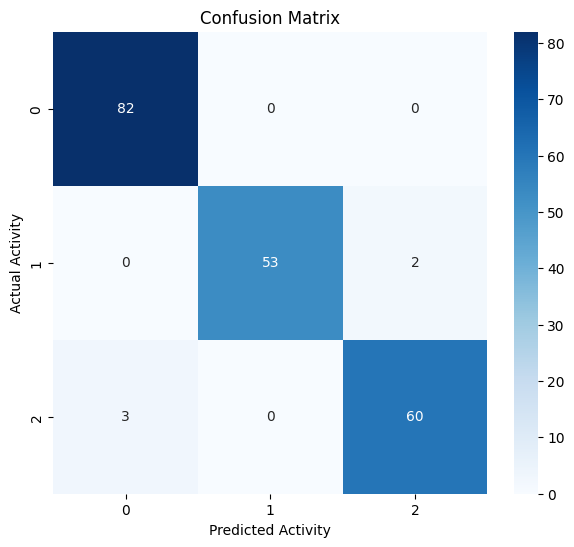

In [100]:
plt.figure(figsize=(7, 6))
cm = confusion_matrix(y_test, y1_pred_classes)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Activity')
plt.ylabel('Actual Activity')
plt.show()

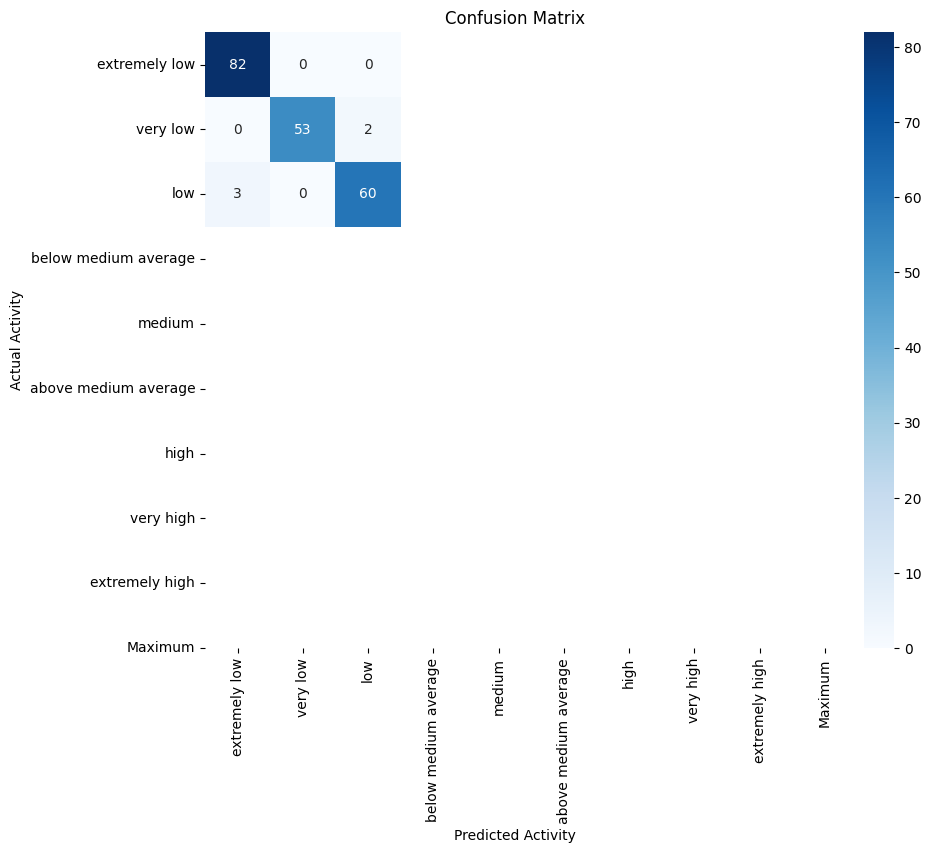

Accuracy Score: 97.5000%
Precision Score: 97.7483%
Recall Score: 97.2006%
F_1 Score: 97.4506%


In [101]:
resultsSummarizer(y_test, y1_pred_classes)

In [102]:

class_report = classification_report(y_test, y1_pred_classes)

print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        82
           1       1.00      0.96      0.98        55
           2       0.97      0.95      0.96        63

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200



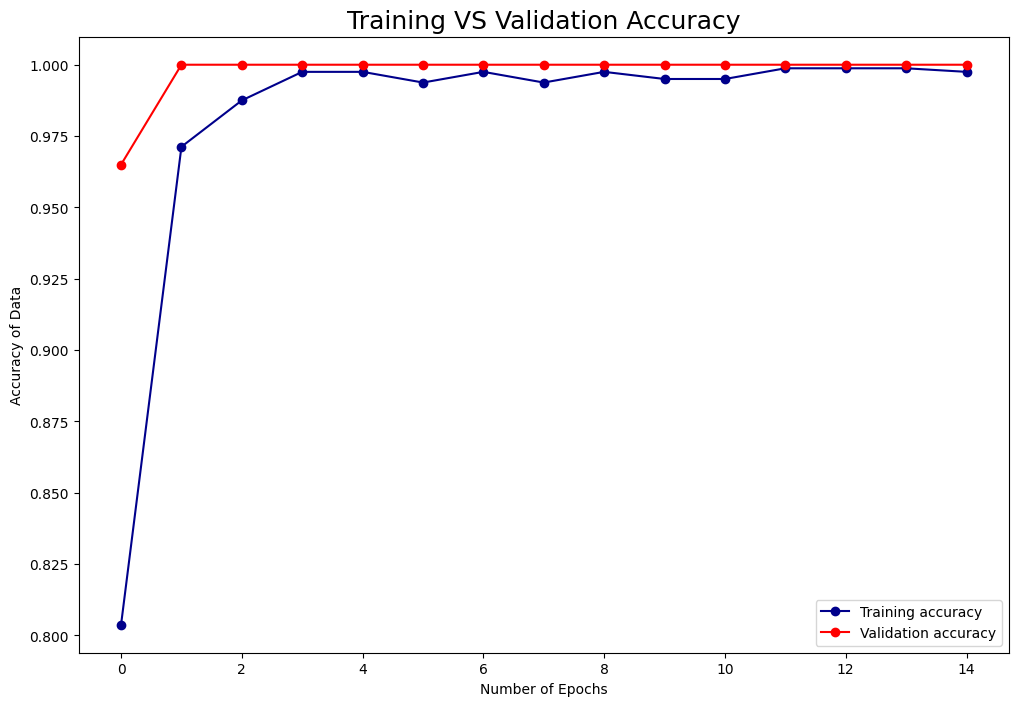

In [103]:
plt.figure(figsize = (12,8))
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy of Data")
plt.plot(history.history["accuracy"], label = "Training accuracy", marker = "o", color = "darkblue",)
plt.plot(history.history["val_accuracy"],label = "Validation accuracy", marker = "o",color = "r",)
plt.title("Training VS Validation Accuracy", fontsize = 18)
plt.legend()
plt.show()

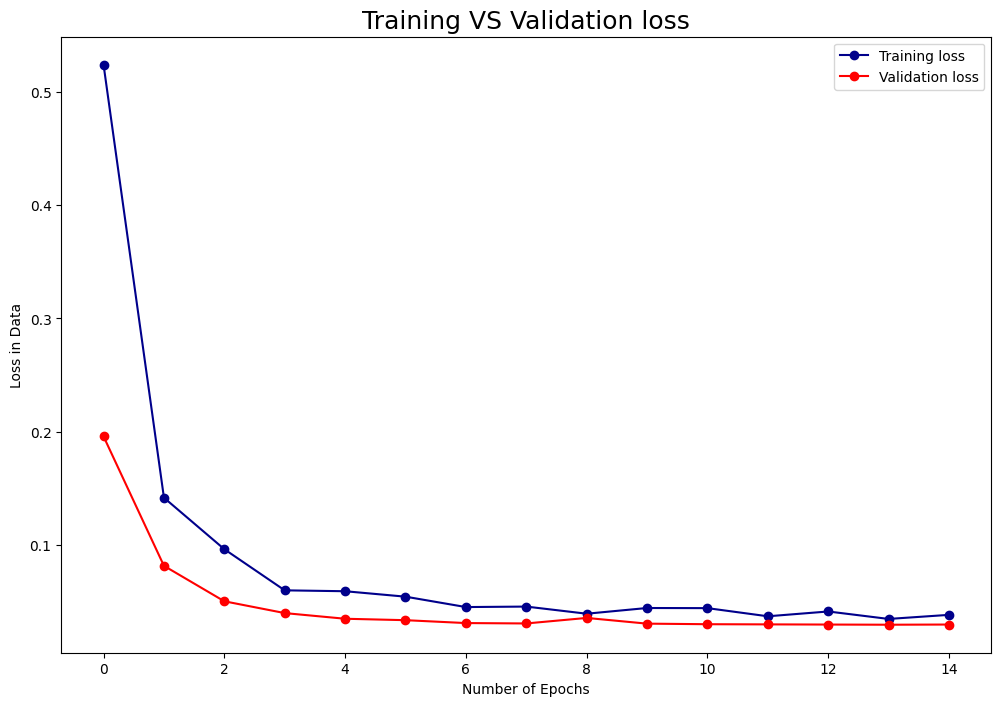

In [104]:
plt.figure(figsize = (12,8))
plt.xlabel("Number of Epochs")
plt.ylabel("Loss in Data")
plt.plot(history.history["loss"], label= "Training loss", marker = "o", color = "darkblue",)
plt.plot(history.history["val_loss"], label= "Validation loss", marker = "o", color = "r",)
plt.title("Training VS Validation loss", fontsize = 18)
plt.legend()
plt.show()